###Trainity Assignment - 6
#Bank Loan Case Study

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from google.colab import drive
drive.mount('/gdrive')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


In [19]:
#import the data
data=pd.read_csv("/content/drive/MyDrive/Trainity Assignments/Trainity Assignment - 6/Dataset/application_data_cleaned.csv")

##Data Quality Check & Missing Values


Find the percentage of missing values of the columns

In [20]:
# function to get null value
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [21]:
# get missign values of all columns
NA_col = column_wise_null_percentage(data)
NA_col

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.01
AMT_GOODS_PRICE                 0.08
NAME_TYPE_SUITE                 0.40
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.31
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Since its EDA we will not replace but if one must replace the coloumns itll be my means of central tendency ie,mean ,median or mode

In [22]:
# Get columns having <15% null values
NA_col_15 = NA_col[NA_col<15]
print("Number of columns having null value less than 15% :", len(NA_col_15.index))
print(NA_col_15)

Number of columns having null value less than 15% : 45
SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.01
AMT_GOODS_PRICE                 0.08
NAME_TYPE_SUITE                 0.40
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_ST

In [23]:
NA_col_15.index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

In [25]:
# understand the insight of missing columns having <15% null values
data[NA_col_15.index].describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   65535.000000  65535.000000  65535.000000      6.553500e+04   
mean   138007.241657      0.080537      0.419532      1.697612e+05   
std     21894.402583      0.272125      0.724485      4.667518e+05   
min    100002.000000      0.000000      0.000000      2.565000e+04   
25%    119110.500000      0.000000      0.000000      1.125000e+05   
50%    137975.000000      0.000000      0.000000      1.440000e+05   
75%    156904.500000      0.000000      1.000000      2.025000e+05   
max    176002.000000      1.000000     11.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  6.553500e+04   65530.000000     6.548200e+04   
mean   5.993438e+05   27071.782725     5.386308e+05   
std    4.026696e+05   14485.959968     3.699318e+05   
min    4.500000e+04    2052.000000     4.500000e+04   
25%    2.700000e+05   16456.500000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34587.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                65535.000000  65535.000000   65535.000000  ...   
mean                     0.020868 -16026.862593   63227.707317  ...   
std                      0.013767   4362.084245  140798.268003  ...   
min                      0.000533 -25201.000000  -17531.000000  ...   
25%                      0.010006 -19656.500000   -2784.000000  ...   
50%                      0.018850 -15749.000000   -1217.000000  ...   
75%                      0.028663 -12390.000000    -288.500000  ...   
max                      0.072508  -7676.000000  365243.000000  ...   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count              65320.000000              65320.000000   
mean                   0.142529                  1.411268   
std                    0.440023                  2.290763   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                    6.000000                 29.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count              65320.000000            65534.000000   
mean                   0.098974             -961.350826   
std                    0.355846              829.220966   
min                    0.000000            -4021.000000   
25%                    0.000000            -1570.000000   
50%                    0.000000             -751.000000   
75%                    0.000000             -268.000000   
max                    5.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                56745.000000               56745.000000   
mean                     0.007102                   0.007631   
std                      0.088670                   0.110726   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      3.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                56745.000000               56745.000000   
mean                     0.033025                   0.269028   
std                      0.199309                   0.924118   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      6.000000                  24.000000   

       

In [27]:
# identify unique values in the colums having <15% null value 
data[NA_col_15.index].nunique().sort_values(ascending=False)

SK_ID_CURR                     65535
EXT_SOURCE_2                   48549
DAYS_BIRTH                     16427
DAYS_REGISTRATION              13320
AMT_ANNUITY                     9566
DAYS_EMPLOYED                   8794
DAYS_ID_PUBLISH                 5856
AMT_CREDIT                      3709
DAYS_LAST_PHONE_CHANGE          3480
AMT_INCOME_TOTAL                 948
AMT_GOODS_PRICE                  555
REGION_POPULATION_RELATIVE        80
ORGANIZATION_TYPE                 58
OBS_30_CNT_SOCIAL_CIRCLE          29
OBS_60_CNT_SOCIAL_CIRCLE          28
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_MON         20
AMT_REQ_CREDIT_BUREAU_YEAR        19
CNT_CHILDREN                      11
CNT_FAM_MEMBERS                   11
AMT_REQ_CREDIT_BUREAU_QRT          9
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_WEEK         7
WEEKDAY_APPR_PROCESS_START         7
AMT_REQ_CREDIT_BUREAU_DAY          7
DEF_30_CNT_SOCIAL_CIRCLE           7
NAME_TYPE_SUITE                    7
N

###For analysis we selected 7 variables
#####1)Continous variables: 
######'EXT_SOURCE_2', 'AMT_GOODS_PRICE'
#####2)Categorial variables: 
######'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE'


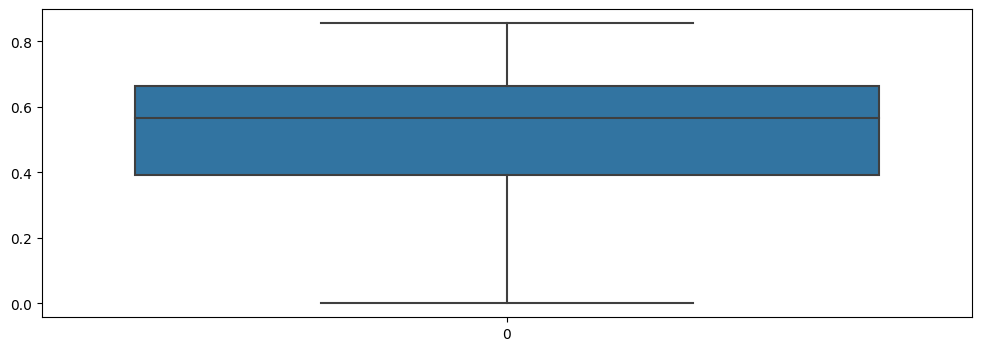

In [28]:
# Box plot for continuious variable
plt.figure(figsize=(12,4))
sns.boxplot(data['EXT_SOURCE_2'])
plt.show()

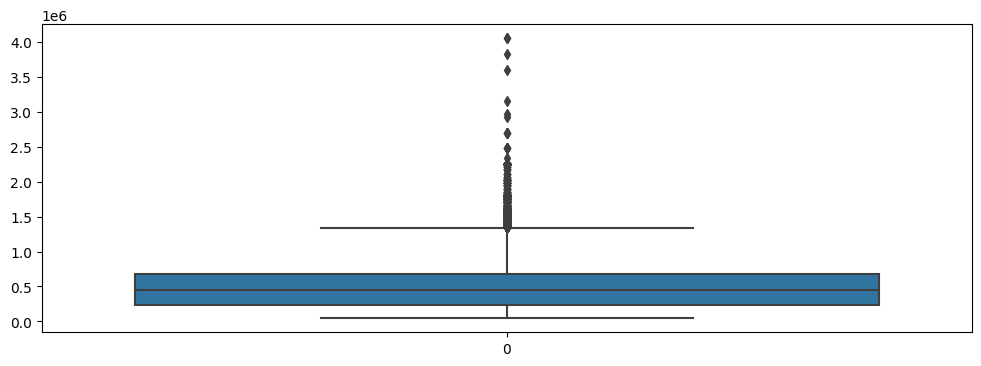

In [29]:
plt.figure(figsize=(12,4))
sns.boxplot(data['AMT_GOODS_PRICE'])
plt.show()

Inference from box plot:

for 'EXT_SOURCE_2' there is no outliers present. And there is no significant diffence observed between mean and median. However data look to be right skewed. So missing values can be imputed with median value: 0.565
for 'AMT_GOODS_PRICE' there is significant number of outlier present in the data. SO data should be imputed with median value: 450000

In [31]:
#For Categorical variables
# identify maximum frequency values
print('Maximum Frequncy categorical values are,')
print('NAME_TYPE_SUITE: ',data['NAME_TYPE_SUITE'].mode()[0])
print('OBS_30_CNT_SOCIAL_CIRCLE:', data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_30_CNT_SOCIAL_CIRCLE:', data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('OBS_60_CNT_SOCIAL_CIRCLE:', data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_60_CNT_SOCIAL_CIRCLE:', data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

Maximum Frequncy categorical values are,
NAME_TYPE_SUITE:  Unaccompanied
OBS_30_CNT_SOCIAL_CIRCLE: 0.0
DEF_30_CNT_SOCIAL_CIRCLE: 0.0
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0


In [32]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        NaN   
4                      0.0                -1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 46 columns]

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns.

In [34]:
# For Code Gender column

print('CODE_GENDER: ',data['CODE_GENDER'].unique())
print('No of values: ',data[data['CODE_GENDER']=='XNA'].shape[0])

XNA_count = data[data['CODE_GENDER']=='XNA'].shape[0]
per_XNA = round(XNA_count/len(data.index)*100,3)

print('% of XNA Values:',  per_XNA)

print('maximum frequency data :', data['CODE_GENDER'].describe().top)

CODE_GENDER:  ['M' 'F' 'XNA']
No of values:  2
% of XNA Values: 0.003
maximum frequency data : F


Since, Female is having the majority and only 2 rows are having XNA values, we can impute those with Gender 'F' as there will be no impact on the dataset. Also there will no impact if we drop those rows.

In [36]:
# Dropping the XNA value in column 'CODE_GENDER' with "F" for the dataset

data = data.drop(data.loc[data['CODE_GENDER']=='XNA'].index)
data[data['CODE_GENDER']=='XNA'].shape

(0, 46)

In [37]:
# For Organization column
print('No of XNA values: ', data[data['ORGANIZATION_TYPE']=='XNA'].shape[0])

XNA_count = data[data['ORGANIZATION_TYPE']=='XNA'].shape[0]
per_XNA = round(XNA_count/len(data.index)*100,3)

print('% of XNA Values:',  per_XNA)

data['ORGANIZATION_TYPE'].describe()

No of XNA values:  11698
% of XNA Values: 17.851


count                      65533
unique                        58
top       Business Entity Type 3
freq                       14455
Name: ORGANIZATION_TYPE, dtype: object

In [38]:
#check data types of all the columns and change data type
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        NaN   
4                      0.0                -1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 46 columns]

In [39]:
# Casting variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'DAYS_LAST_PHONE_CHANGE']

data[numeric_columns]=data[numeric_columns].apply(pd.to_numeric)
data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        NaN   
4                      0.0                -1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 46 columns]

In [41]:
# Converting '-ve' values into '+ve' Values
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].abs()
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION'].abs()
data['DAYS_ID_PUBLISH'] = data['DAYS_ID_PUBLISH'].abs()
data['DAYS_LAST_PHONE_CHANGE'] = data['DAYS_LAST_PHONE_CHANGE'].abs()

Checking for outliers in numeric variables



In [42]:
# describe numeric columns
data[numeric_columns].describe()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  65533.000000  65533.000000      6.553300e+04  6.553300e+04   
mean       0.080540      0.419514      1.697608e+05  5.993521e+05   
std        0.272129      0.724468      4.667589e+05  4.026728e+05   
min        0.000000      0.000000      2.565000e+04  4.500000e+04   
25%        0.000000      0.000000      1.125000e+05  2.700000e+05   
50%        0.000000      0.000000      1.440000e+05  5.135310e+05   
75%        0.000000      1.000000      2.025000e+05  8.086500e+05   
max        1.000000     11.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count   65528.000000                65533.000000  65533.000000   65533.000000   
mean    27072.111113                    0.020868  16026.833672   67165.925381   
std     14486.050745                    0.013767   4362.110547  138965.287928   
min      2052.000000                    0.000533   7676.000000       0.000000   
25%     16456.500000                    0.010006  12390.000000     930.000000   
50%     24903.000000                    0.018850  15749.000000    2213.000000   
75%     34587.000000                    0.028663  19656.000000    5709.000000   
max    258025.500000                    0.072508  25201.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
count       65533.000000     65533.000000             65533.000000   
mean         4979.452169      2993.947050                12.050784   
std          3522.798047      1511.866474                 3.257380   
min             0.000000         0.000000                 0.000000   
25%          2008.000000      1716.000000                10.000000   
50%          4490.000000      3257.000000                12.000000   
75%          7466.000000      4297.000000                14.000000   
max         22392.000000      6265.000000                23.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                 65533.000000            65533.000000   
mean                      0.039949                0.079609   
std                       0.195842                0.270689   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  
count            65533.000000             65533.000000            65532.000000  
mean                 0.231654                 0.179284              961.368278  
std                  0.421893                 0.383593              829.227405  
min                  0.000000                 0.000000                0.000000  
25%                  0.000000                 0.000000              268.000000  
50%                  0.000000                 0.000000              751.000000  
75%                  0.000000                 0.000000             1570.000000  
max                  1.000000                 1.000000             4021.000000

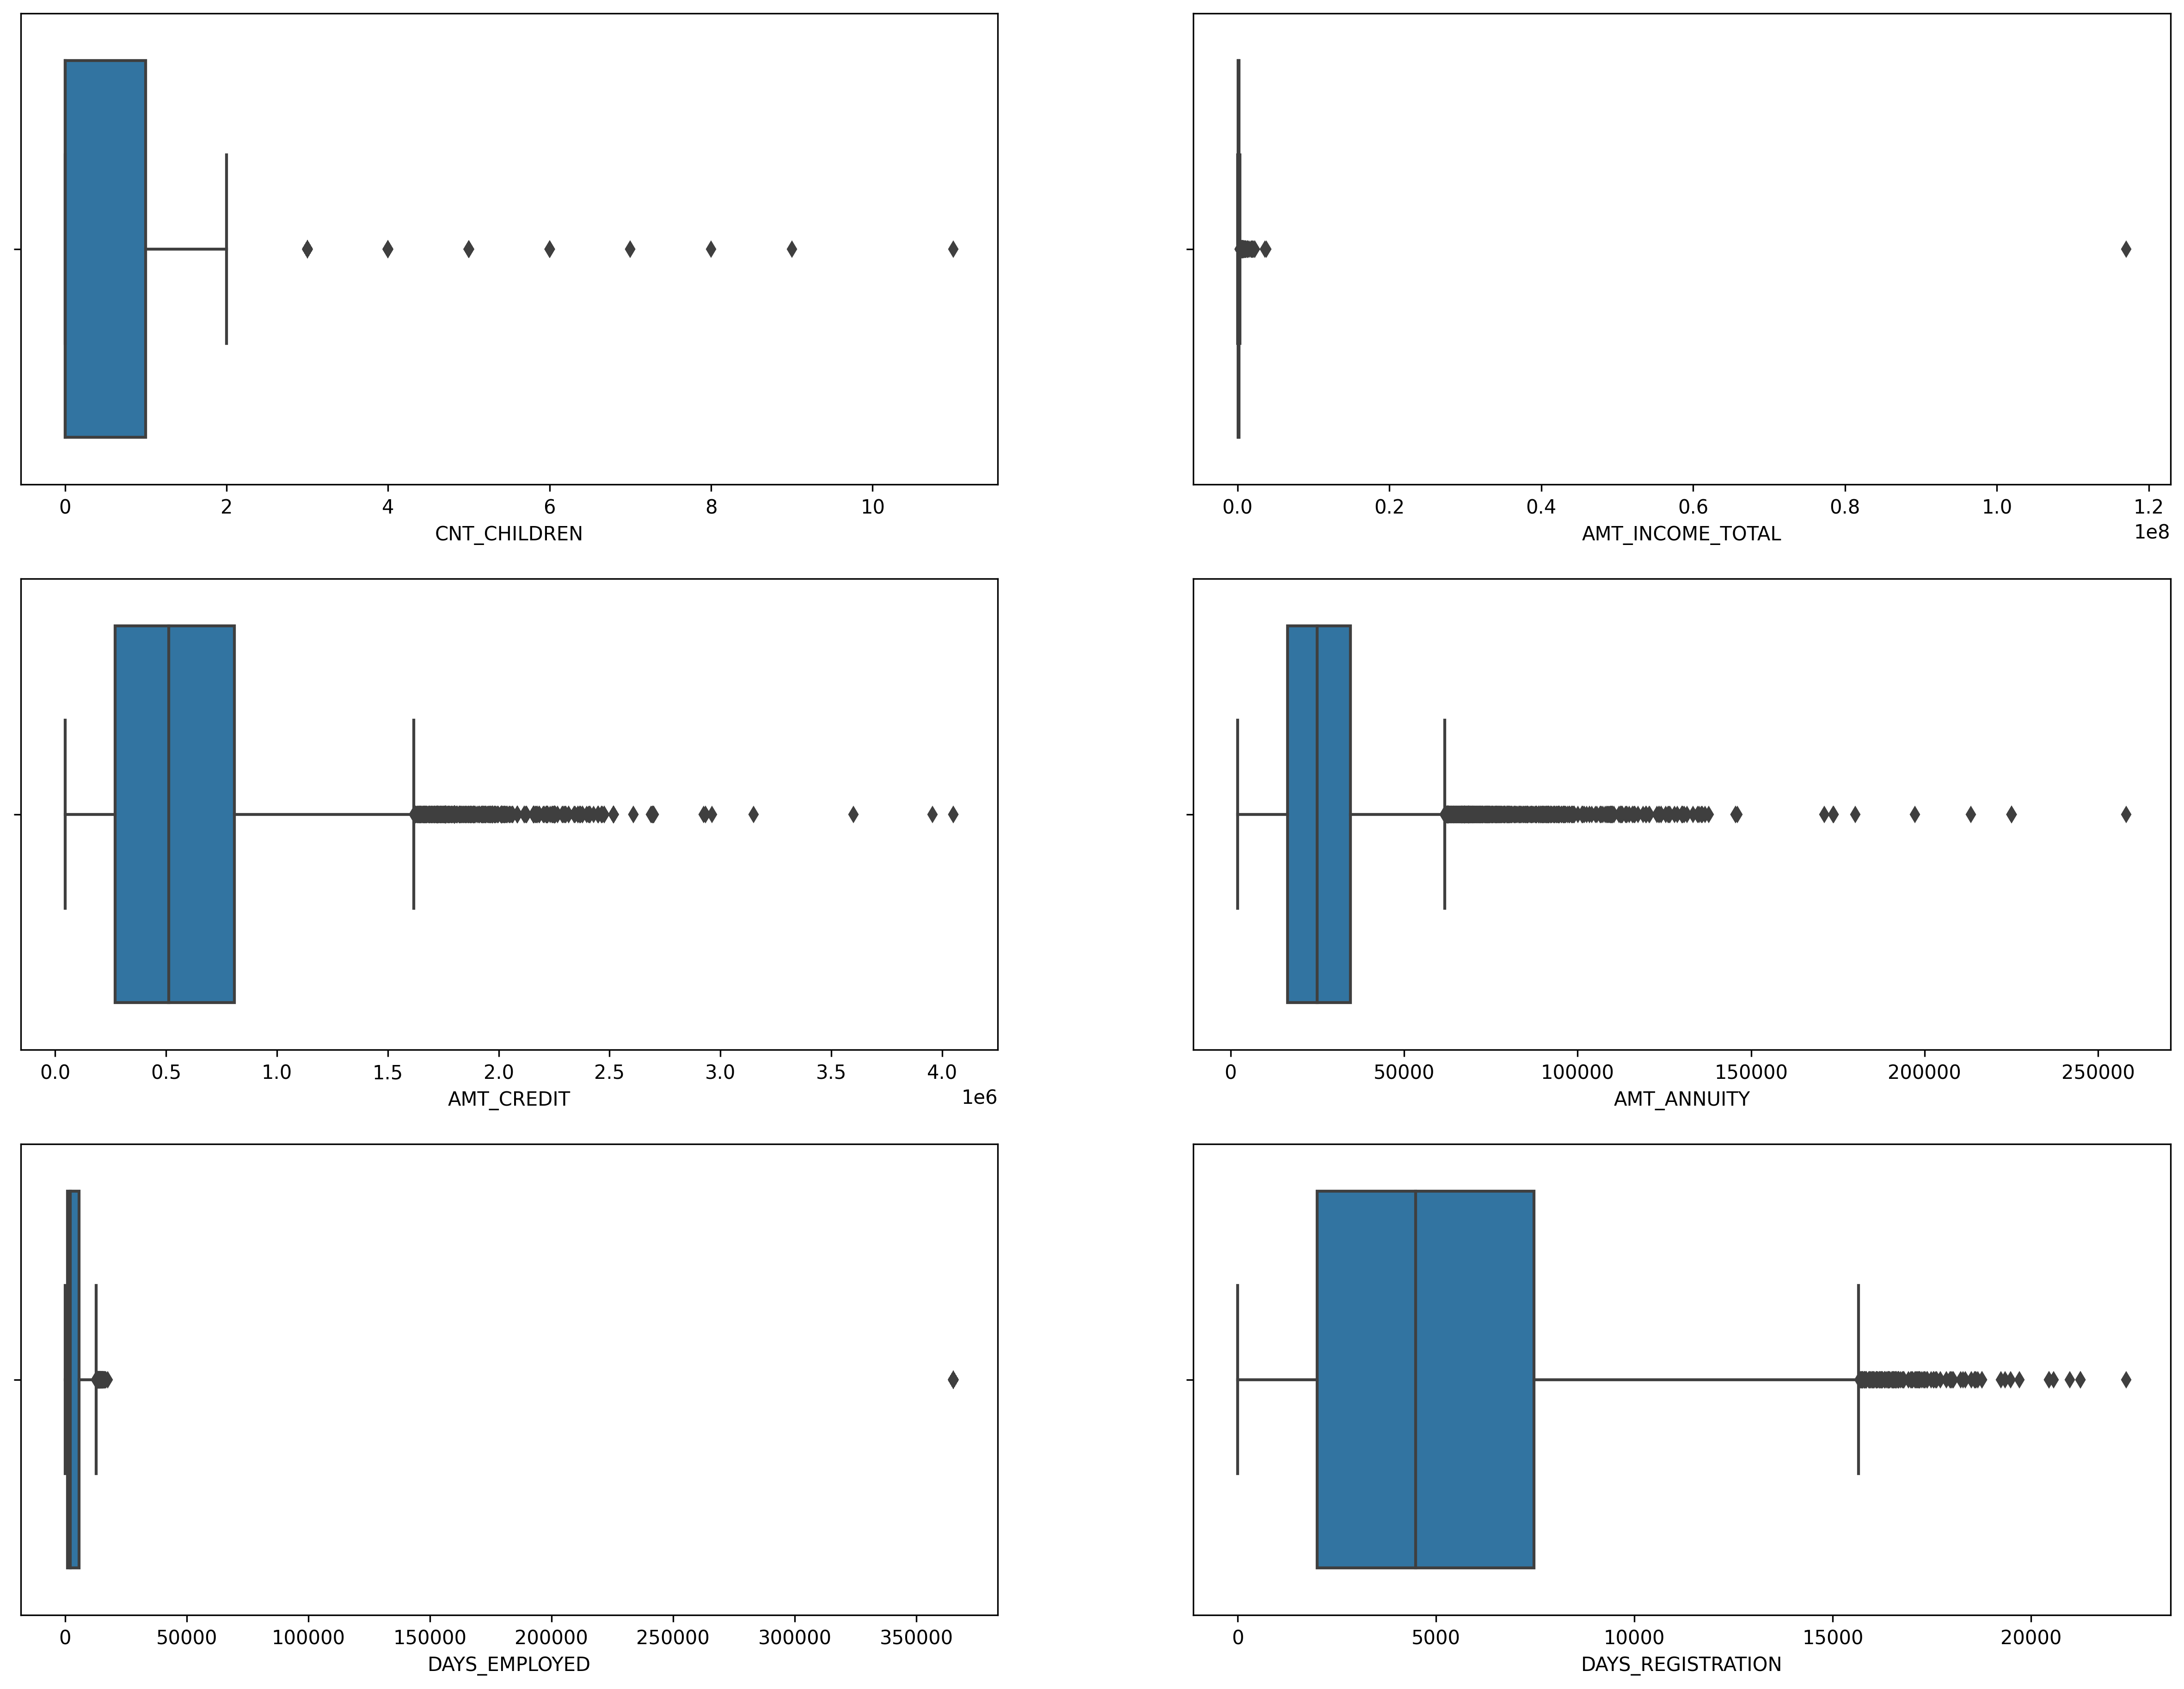

In [44]:
# Box plot for selected columns
features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_REGISTRATION']

plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = data)
plt.show()

The first quartile almost missing for CNT_CHILDREN that means most of the data are present in the first quartile.

There is single high value data point as outlier present in AMT_INCOME_TOTAL and Removal this point will dtrasticaly impact the box plot for further analysis.

The first quartiles is slim compare to third quartile for AMT_CREDIT,AMT_ANNUITY, DAYS_EMPLOYED, DAYS_REGISTRATION. This mean data are skewed towards first quartile.

In [45]:
#Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [46]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000',
        '600000-700000','700000-800000','850000-900000','900000 and above']

data['AMT_CREDIT_RANGE']=pd.cut(data['AMT_CREDIT'],bins,labels=slot)

#Analysis



In [48]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=data.loc[data["TARGET"]==0]
target1_df=data.loc[data["TARGET"]==1]

In [49]:
# insights from number of target values

percentage_defaulters= round(100*len(target1_df)/(len(target0_df)+len(target1_df)),2)

percentage_nondefaulters=round(100*len(target0_df)/(len(target0_df)+len(target1_df)),2)

print('Count of target0_df:', len(target0_df))
print('Count of target1_df:', len(target1_df))


print('Percentage of people who paid their loan are: ', percentage_nondefaulters, '%' )
print('Percentage of people who did not paid their loan are: ', percentage_defaulters, '%' )

Count of target0_df: 60255
Count of target1_df: 5278
Percentage of people who paid their loan are:  91.95 %
Percentage of people who did not paid their loan are:  8.05 %


In [50]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

imb_ratio = round(len(target0_df)/len(target1_df),2)

print('Imbalance Ratio:', imb_ratio)

Imbalance Ratio: 11.42


####Univariate Analysis

In [52]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.titlepad'] = 14
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        
    plt.show()

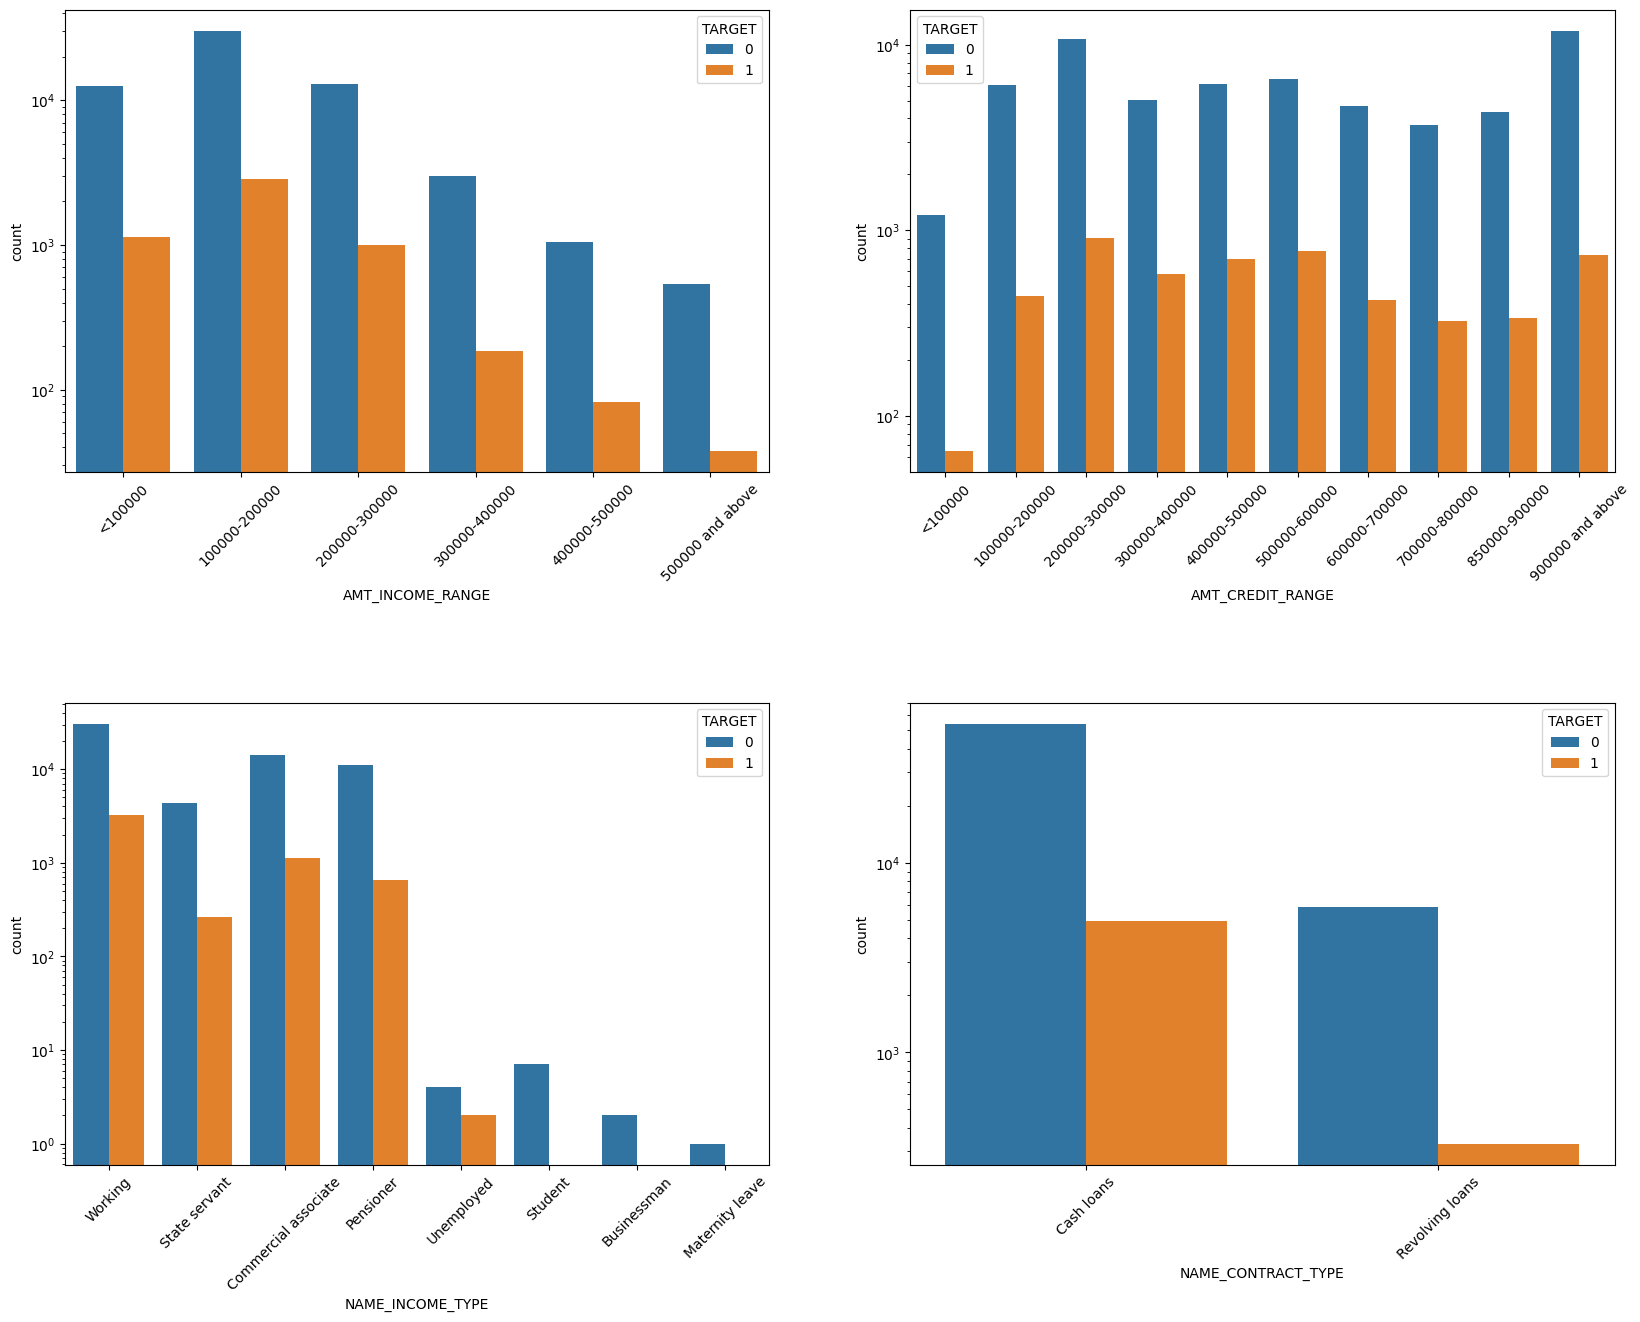

In [54]:
# Categoroical Univariate Analysis in logarithmic scale

features = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = data)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')
    

Insights:
AMT_INCOME_RANGE :

* The people having 100000-200000 are havign higher number of loan and also having higher in defaulter
* The income segment having >500000 are having less defaulter.

AMT_CREDIT_RANGE:

* The people having <100000 loan are less defaulter.
* income having more thatn >100000 are almost equal % of loan defaulter

NAME_INCOME_TYPE:

* Student pensioner and business have higher percentage of loan repayment.
* Working, State servent and Commercial associates have higher default percentage.
* Maternity category is significantly higher problem in replayement.

NAME_CONTRACT_TYPE

* For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
* From the above graphs we can see that the Revolving loans are small amount compared to Cash loans but the % of non payment for the revolving loans are comapritvely high.

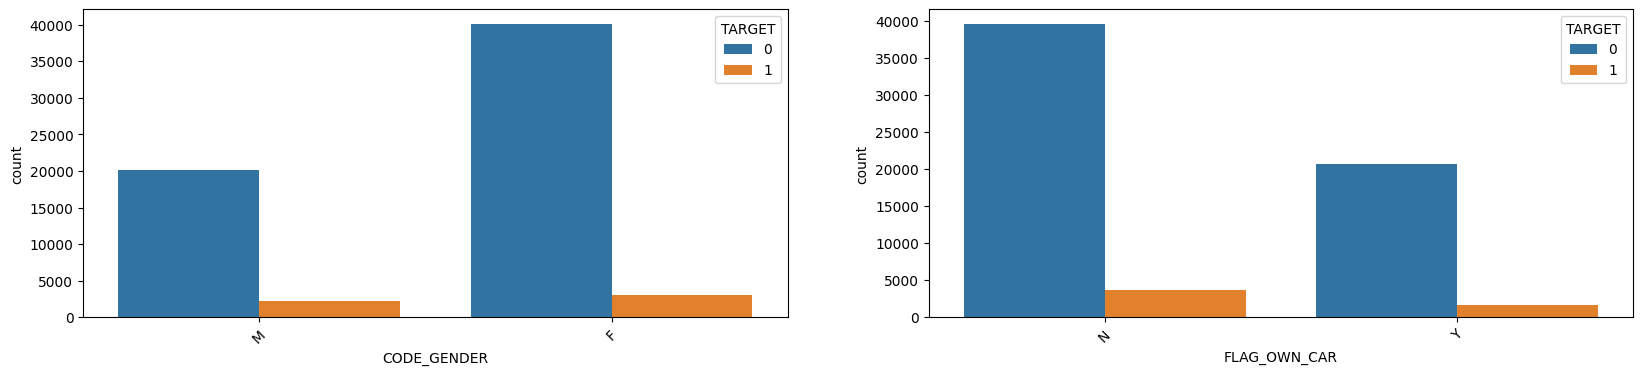

In [55]:
# Categoroical Univariate Analysis in Value scale

features = ['CODE_GENDER','FLAG_OWN_CAR']
plt.figure(figsize = (20, 10))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = data)
     
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 45)
#     plt.yscale('log')

CODE_GENDER:

* The % of defaulters are more in Male than Female


FLAG_OWN_CAR:

* The person owning car is having higher percentage of defaulter.

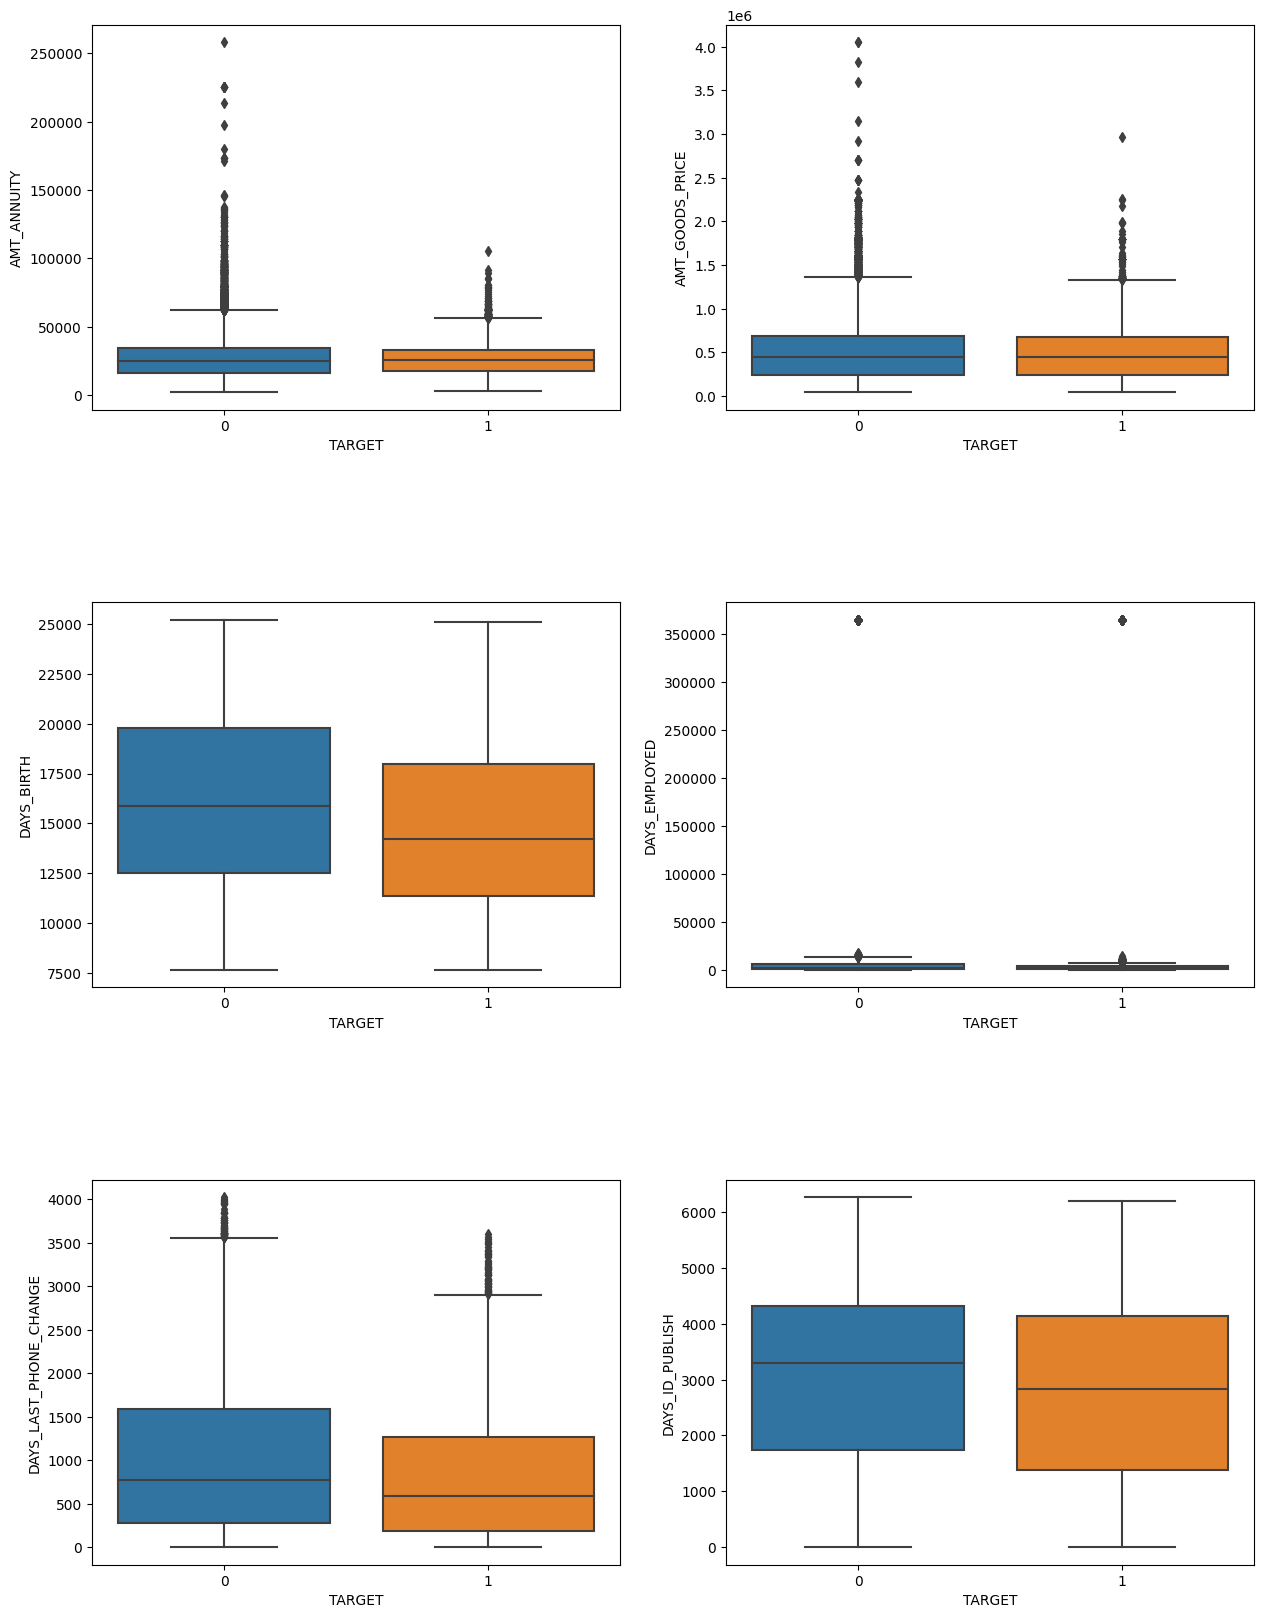

In [56]:
# Univariate Analysis for continous variable

features = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH']
plt.figure(figsize = (15, 20))

for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = i[1], data = data)

Inference:

Days_Birth: The people having higher age are having higher probability of repayment.
Some outliers are observed in In 'AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', DAYS_LAST_PHONE_CHANGE in the dataset.
Less outlier observed in Days_Birth and DAYS_ID_PUBLISH
1st quartile is smaller than third quartile in In 'AMT_ANNUITY','AMT_GOODS_PRICE', DAYS_LAST_PHONE_CHANGE.
In DAYS_ID_PUBLISH: people changing ID in recent days are relativelty prone to be default.
There is single high value data point as outlier present in DAYS_EMPLOYED. Removal this point will drastically impact the box plot for further analysis.

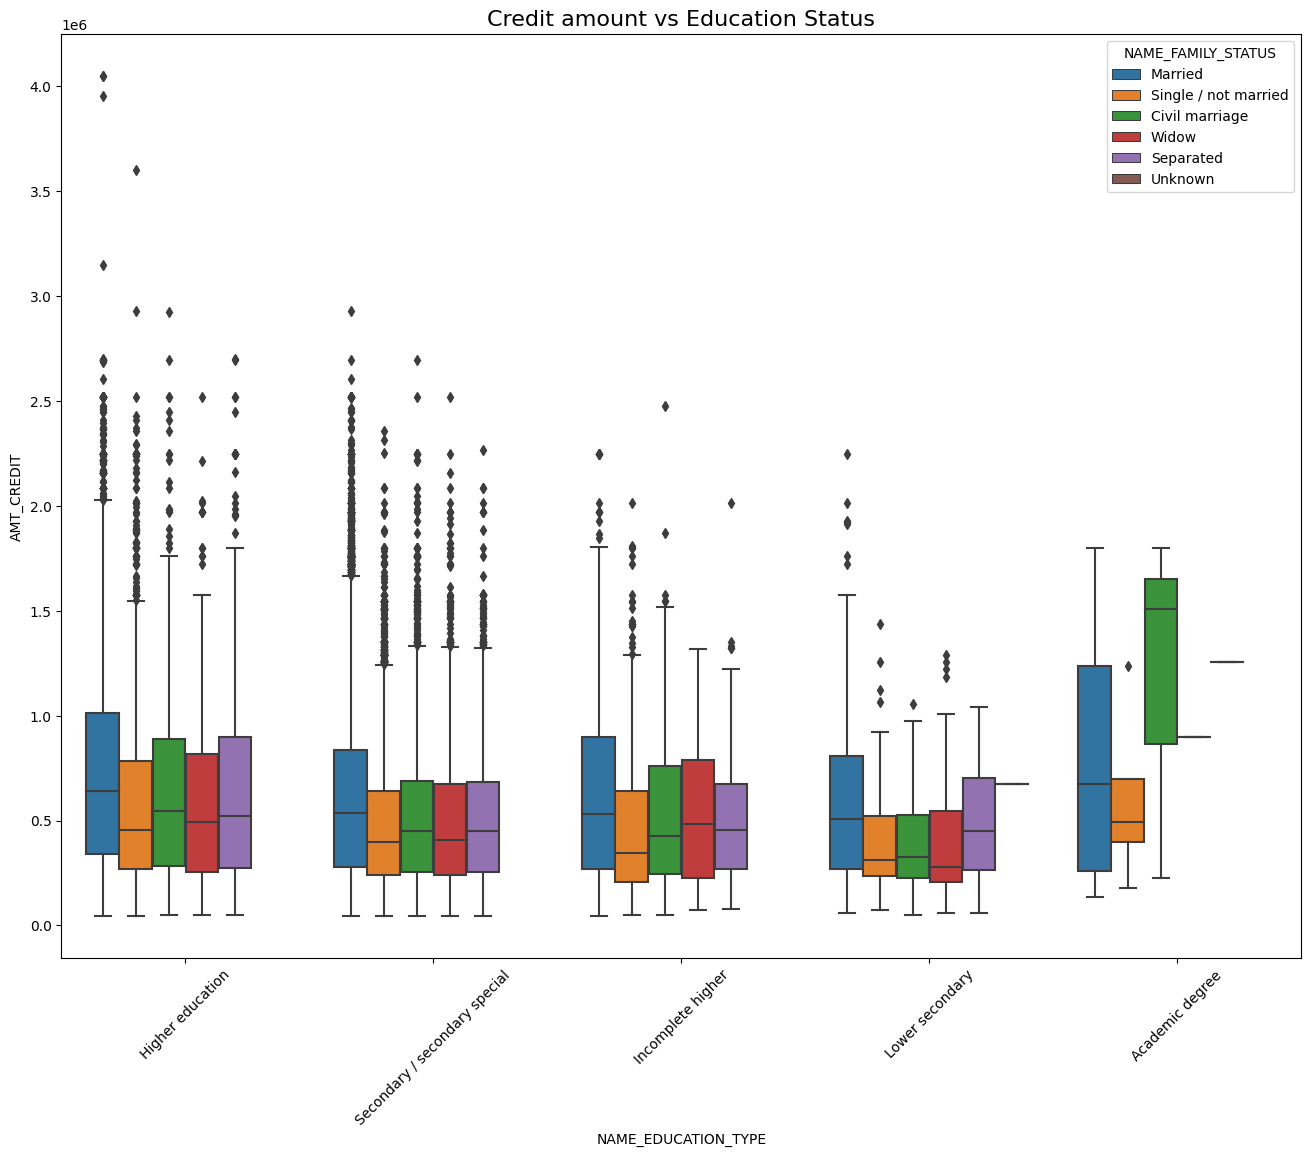

In [58]:
#Bivariate for numerical values
#For Target 0
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

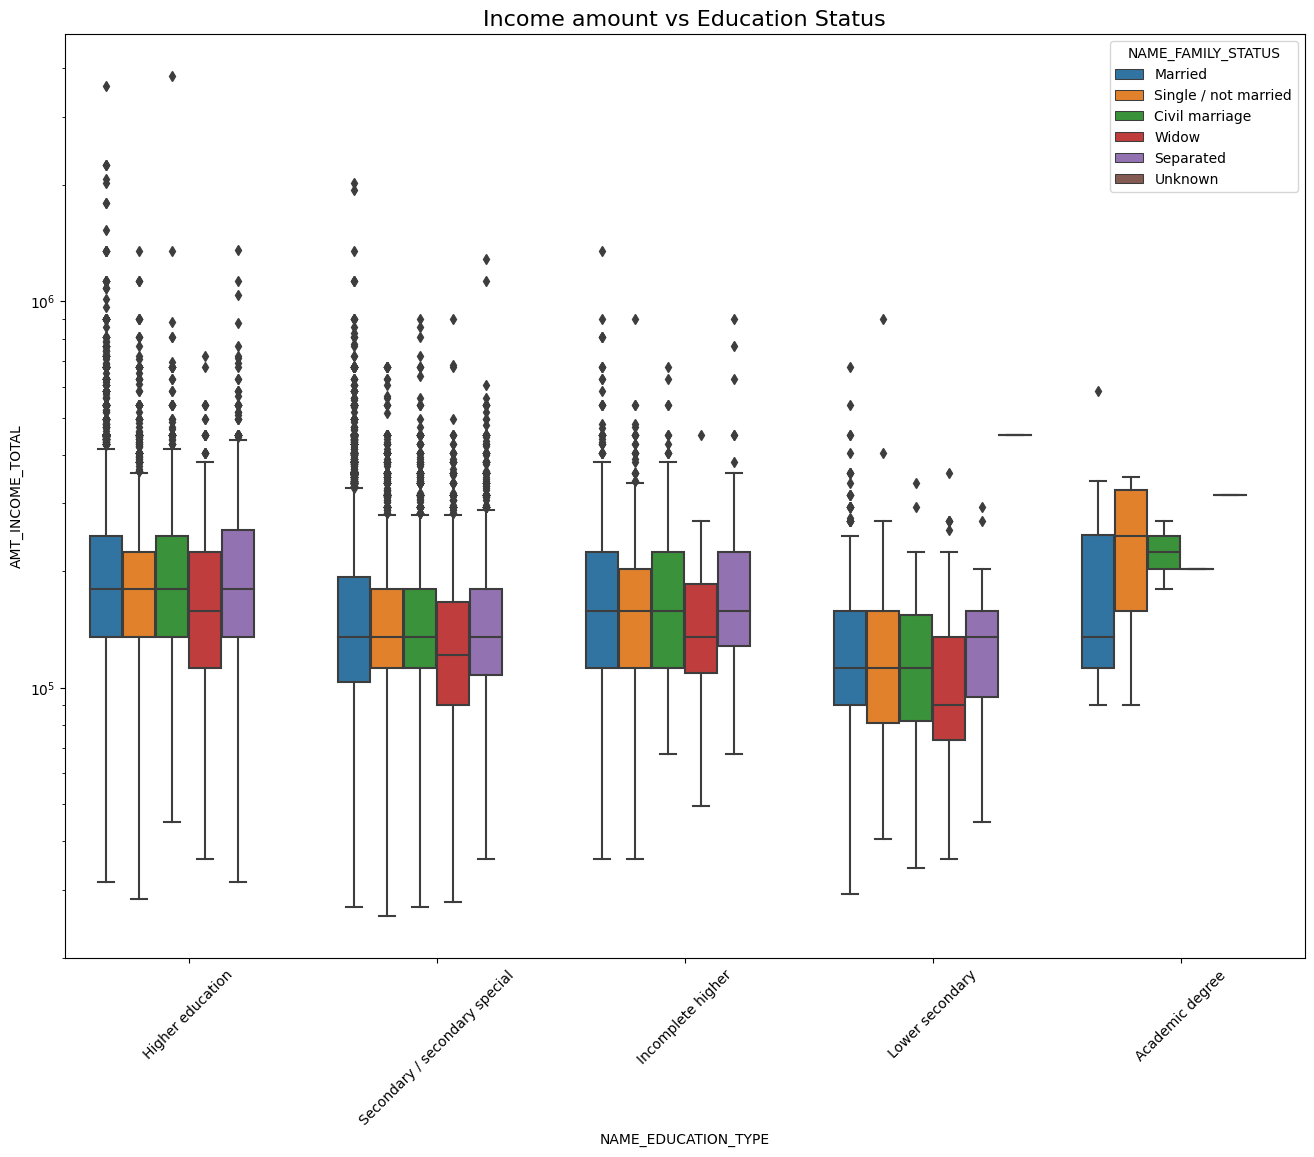

In [59]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

In Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers.
Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

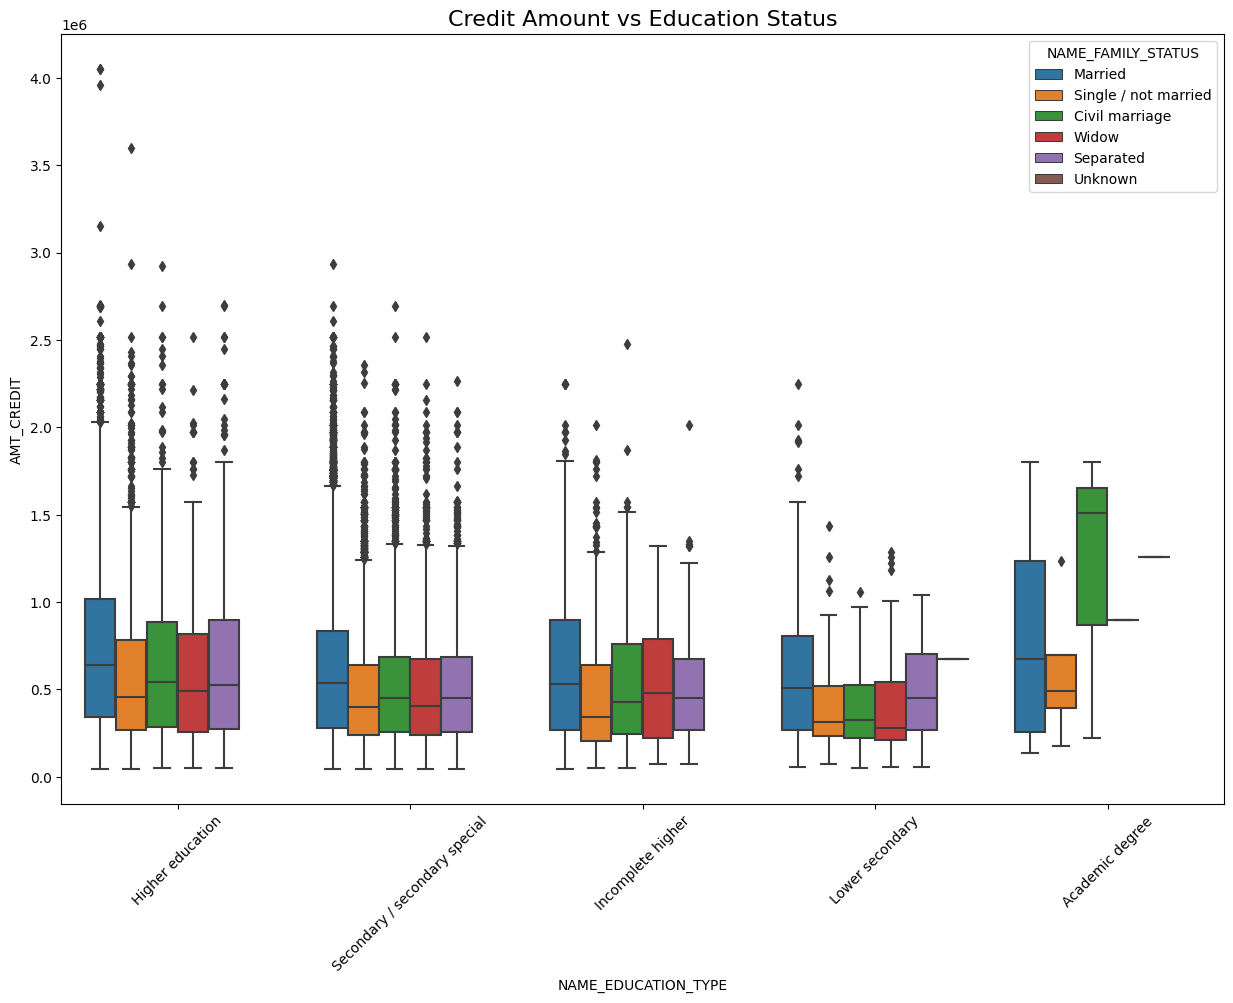

In [61]:
#For Target 1
# Box plotting for credit amount

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Observations are Quite similar with Target 0
Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

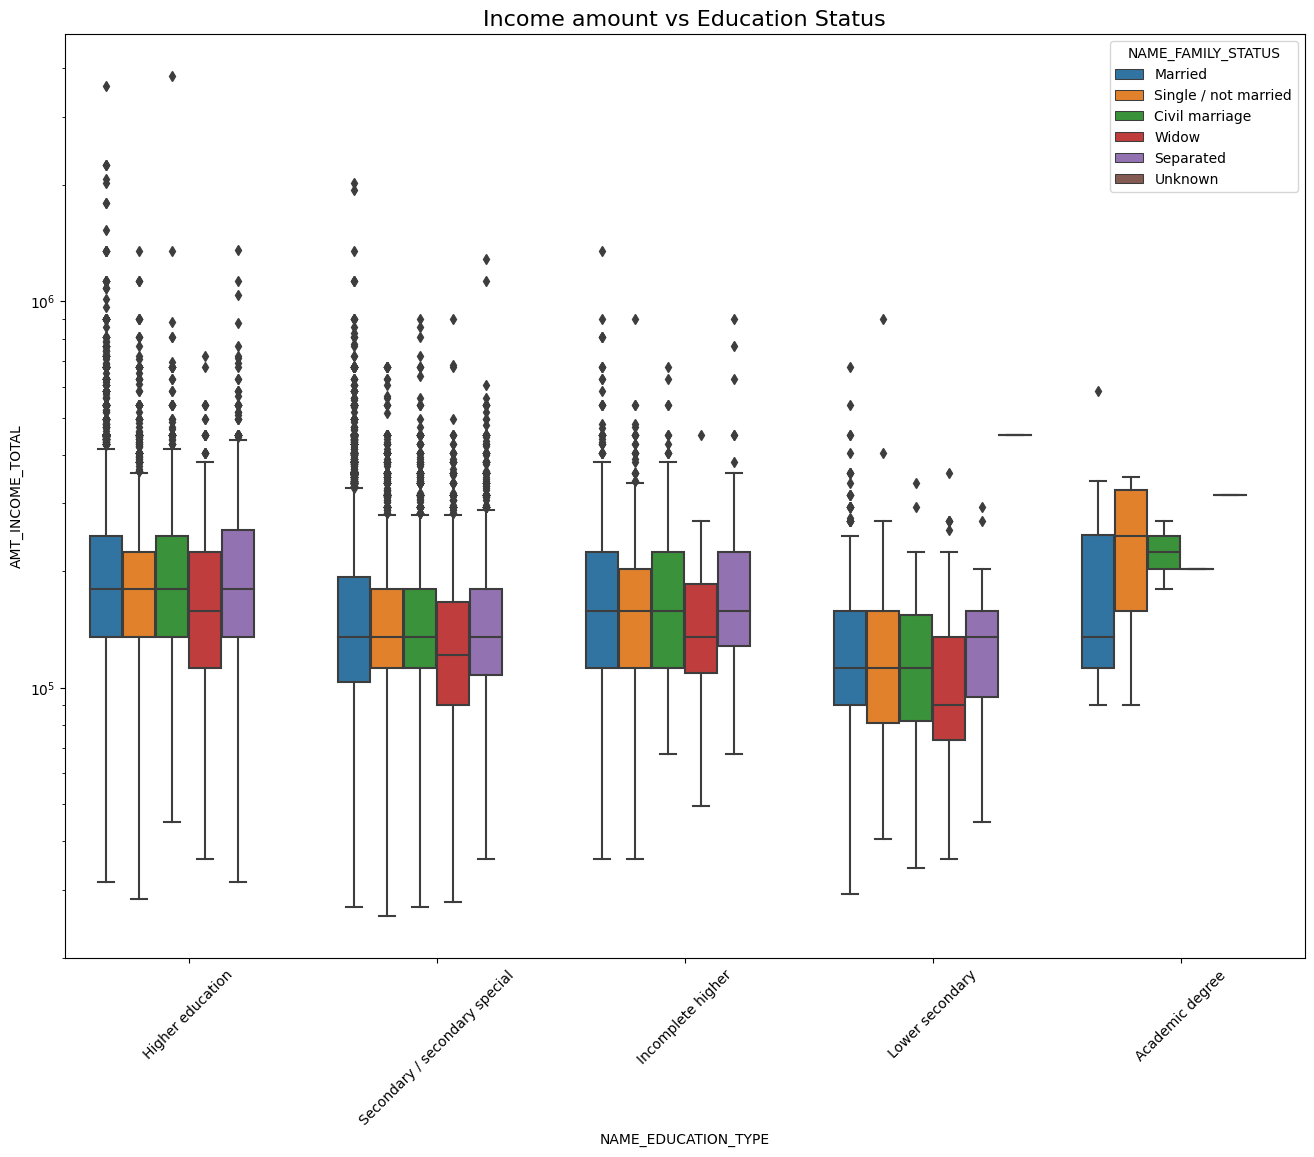

In [62]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

There is also have some similarity with Target0,
Education type 'Higher education' the income amount is mostly equal with family status.
Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.

In [63]:
#Correlation
# Top 10 correlated variables: target 0 dataaframe

corr = target0_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

<ipython-input-63-227e5fa313af>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = target0_df.corr()
<ipython-input-63-227e5fa313af>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


Var1                        Var2  Correlation
873     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
208              AMT_GOODS_PRICE                  AMT_CREDIT         0.99
489  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
410              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
629  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
908     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.85
734      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
209              AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
174                  AMT_ANNUITY                  AMT_CREDIT         0.77
314                DAYS_EMPLOYED                  DAYS_BIRTH         0.62

In [64]:
# Top 10 correlated variables: target 1 dataaframe

corr = target1_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

<ipython-input-64-83c9c380cf9a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = target1_df.corr()
<ipython-input-64-83c9c380cf9a>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


Var1                        Var2  Correlation
873     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
208              AMT_GOODS_PRICE                  AMT_CREDIT         0.98
489  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.94
410              CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
908     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.88
629  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.81
734      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
174                  AMT_ANNUITY                  AMT_CREDIT         0.75
209              AMT_GOODS_PRICE                 AMT_ANNUITY         0.75
314                DAYS_EMPLOYED                  DAYS_BIRTH         0.59

From the above correlation analysis it is infered that the highest corelation (1.0) is between (OBS_60_CNT_SOCIAL_CIRCLE with OBS_30_CNT_SOCIAL_CIRCLE) and (FLOORSMAX_MEDI with FLOORSMAX_AVG) which is same for both the data set.

#Read Previous Application data and merging with application data

In [66]:
prev=pd.read_csv(("/content/drive/MyDrive/Trainity Assignments/Trainity Assignment - 6/Dataset/previous_application (1).csv"))

In [67]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [68]:
# get the type of dataset
prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [69]:
# displaying the informtion of previous application dataset
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [70]:
# Describing the previous application dataset
prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [71]:
# Finding percentage of null values columns
NA_col_pre = column_wise_null_percentage(prev)

In [72]:
# identify columns only with null values
NA_col_pre = NA_col_pre[NA_col_pre>0]
NA_col_pre

AMT_ANNUITY                  22.29
AMT_DOWN_PAYMENT             53.64
AMT_GOODS_PRICE              23.08
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

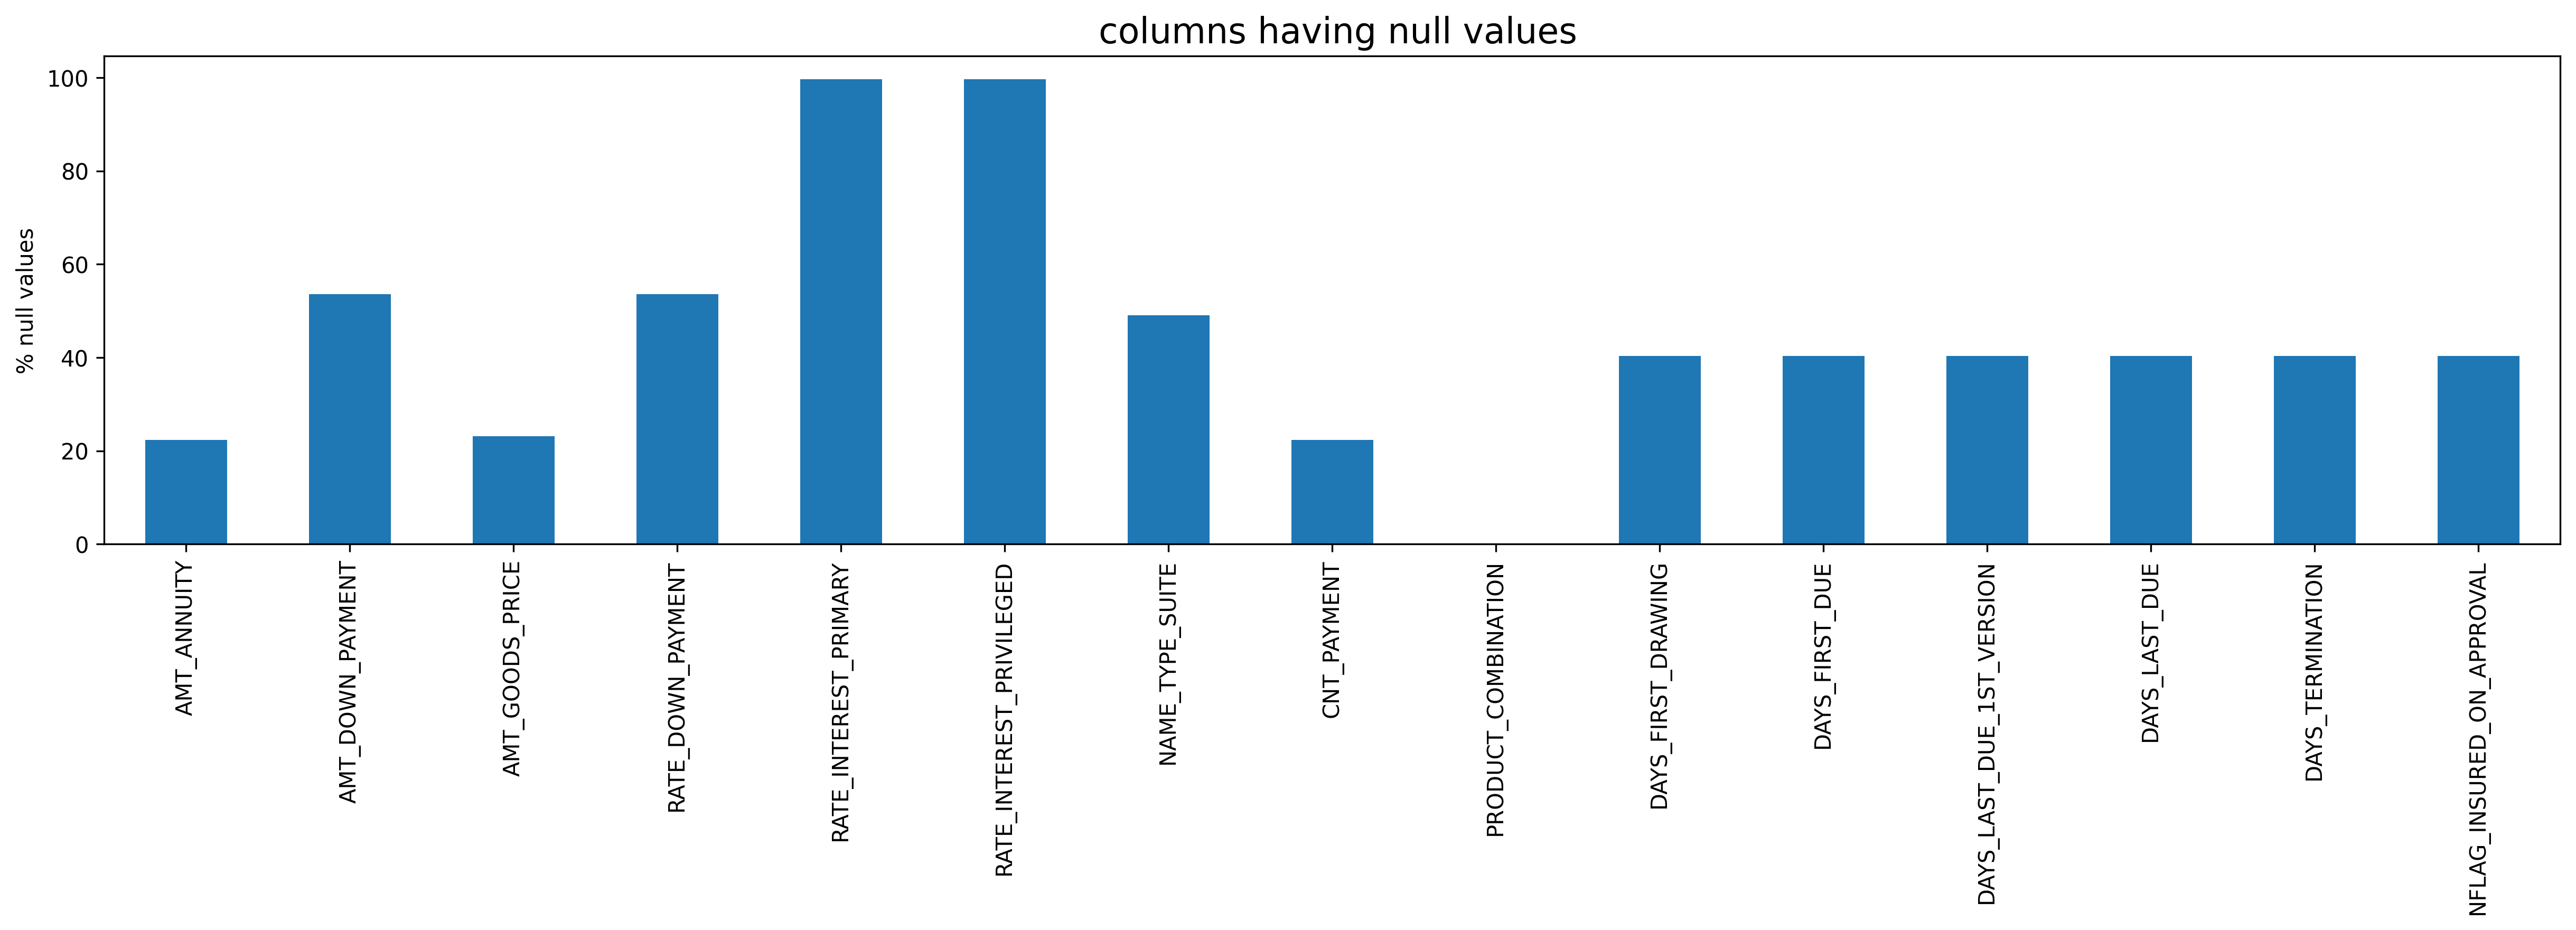

In [73]:
# graphical representation of columns having % null values
plt.figure(figsize= (20,4),dpi=300)
NA_col_pre.plot(kind = 'bar')
plt.title (' columns having null values')
plt.ylabel('% null values')
plt.show()

In [74]:
# Get the column with null values more than 50%
NA_col_pre = NA_col_pre[NA_col_pre>50]
print("Number of columns having null value more than 50% :", len(NA_col_pre.index))
print(NA_col_pre)

Number of columns having null value more than 50% : 4
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64


In [76]:
# removed 4 columns having null percentage more than 50%.
prev = prev.drop(NA_col_pre.index, axis =1)
prev.shape

(1670214, 33)

In [79]:
# Merging the Application dataset with previous appliaction dataset

df_comb = pd.merge(left=data,right=prev,how='inner',on='SK_ID_CURR',suffixes='_x')
df_comb.shape

<ipython-input-79-bea94fcb8ddd>:3: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_comb = pd.merge(left=data,right=prev,how='inner',on='SK_ID_CURR',suffixes='_x')


(300438, 80)

In [80]:
df_comb.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100002       1          Cash loans           M            N   
1      100003       0          Cash loans           F            N   
2      100003       0          Cash loans           F            N   
3      100003       0          Cash loans           F            N   
4      100004       0     Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0               Y             0          202500.0     406597.5       24700.5   
1               N             0          270000.0    1293502.5       35698.5   
2               N             0          270000.0    1293502.5       35698.5   
3               N             0          270000.0    1293502.5       35698.5   
4               Y             0           67500.0     135000.0        6750.0   

   ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0  ...       Auto technology        24.0       low_normal   
1  ...                   XNA        12.0       low_normal   
2  ...             Furniture         6.0           middle   
3  ...  Consumer electronics        12.0           middle   
4  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 80 columns]

In [81]:
# Renaming the column names after merging from combined df

df_comb = df_comb.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [82]:
# Removing unwanted columns from cmbined df for analysis

df_comb.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

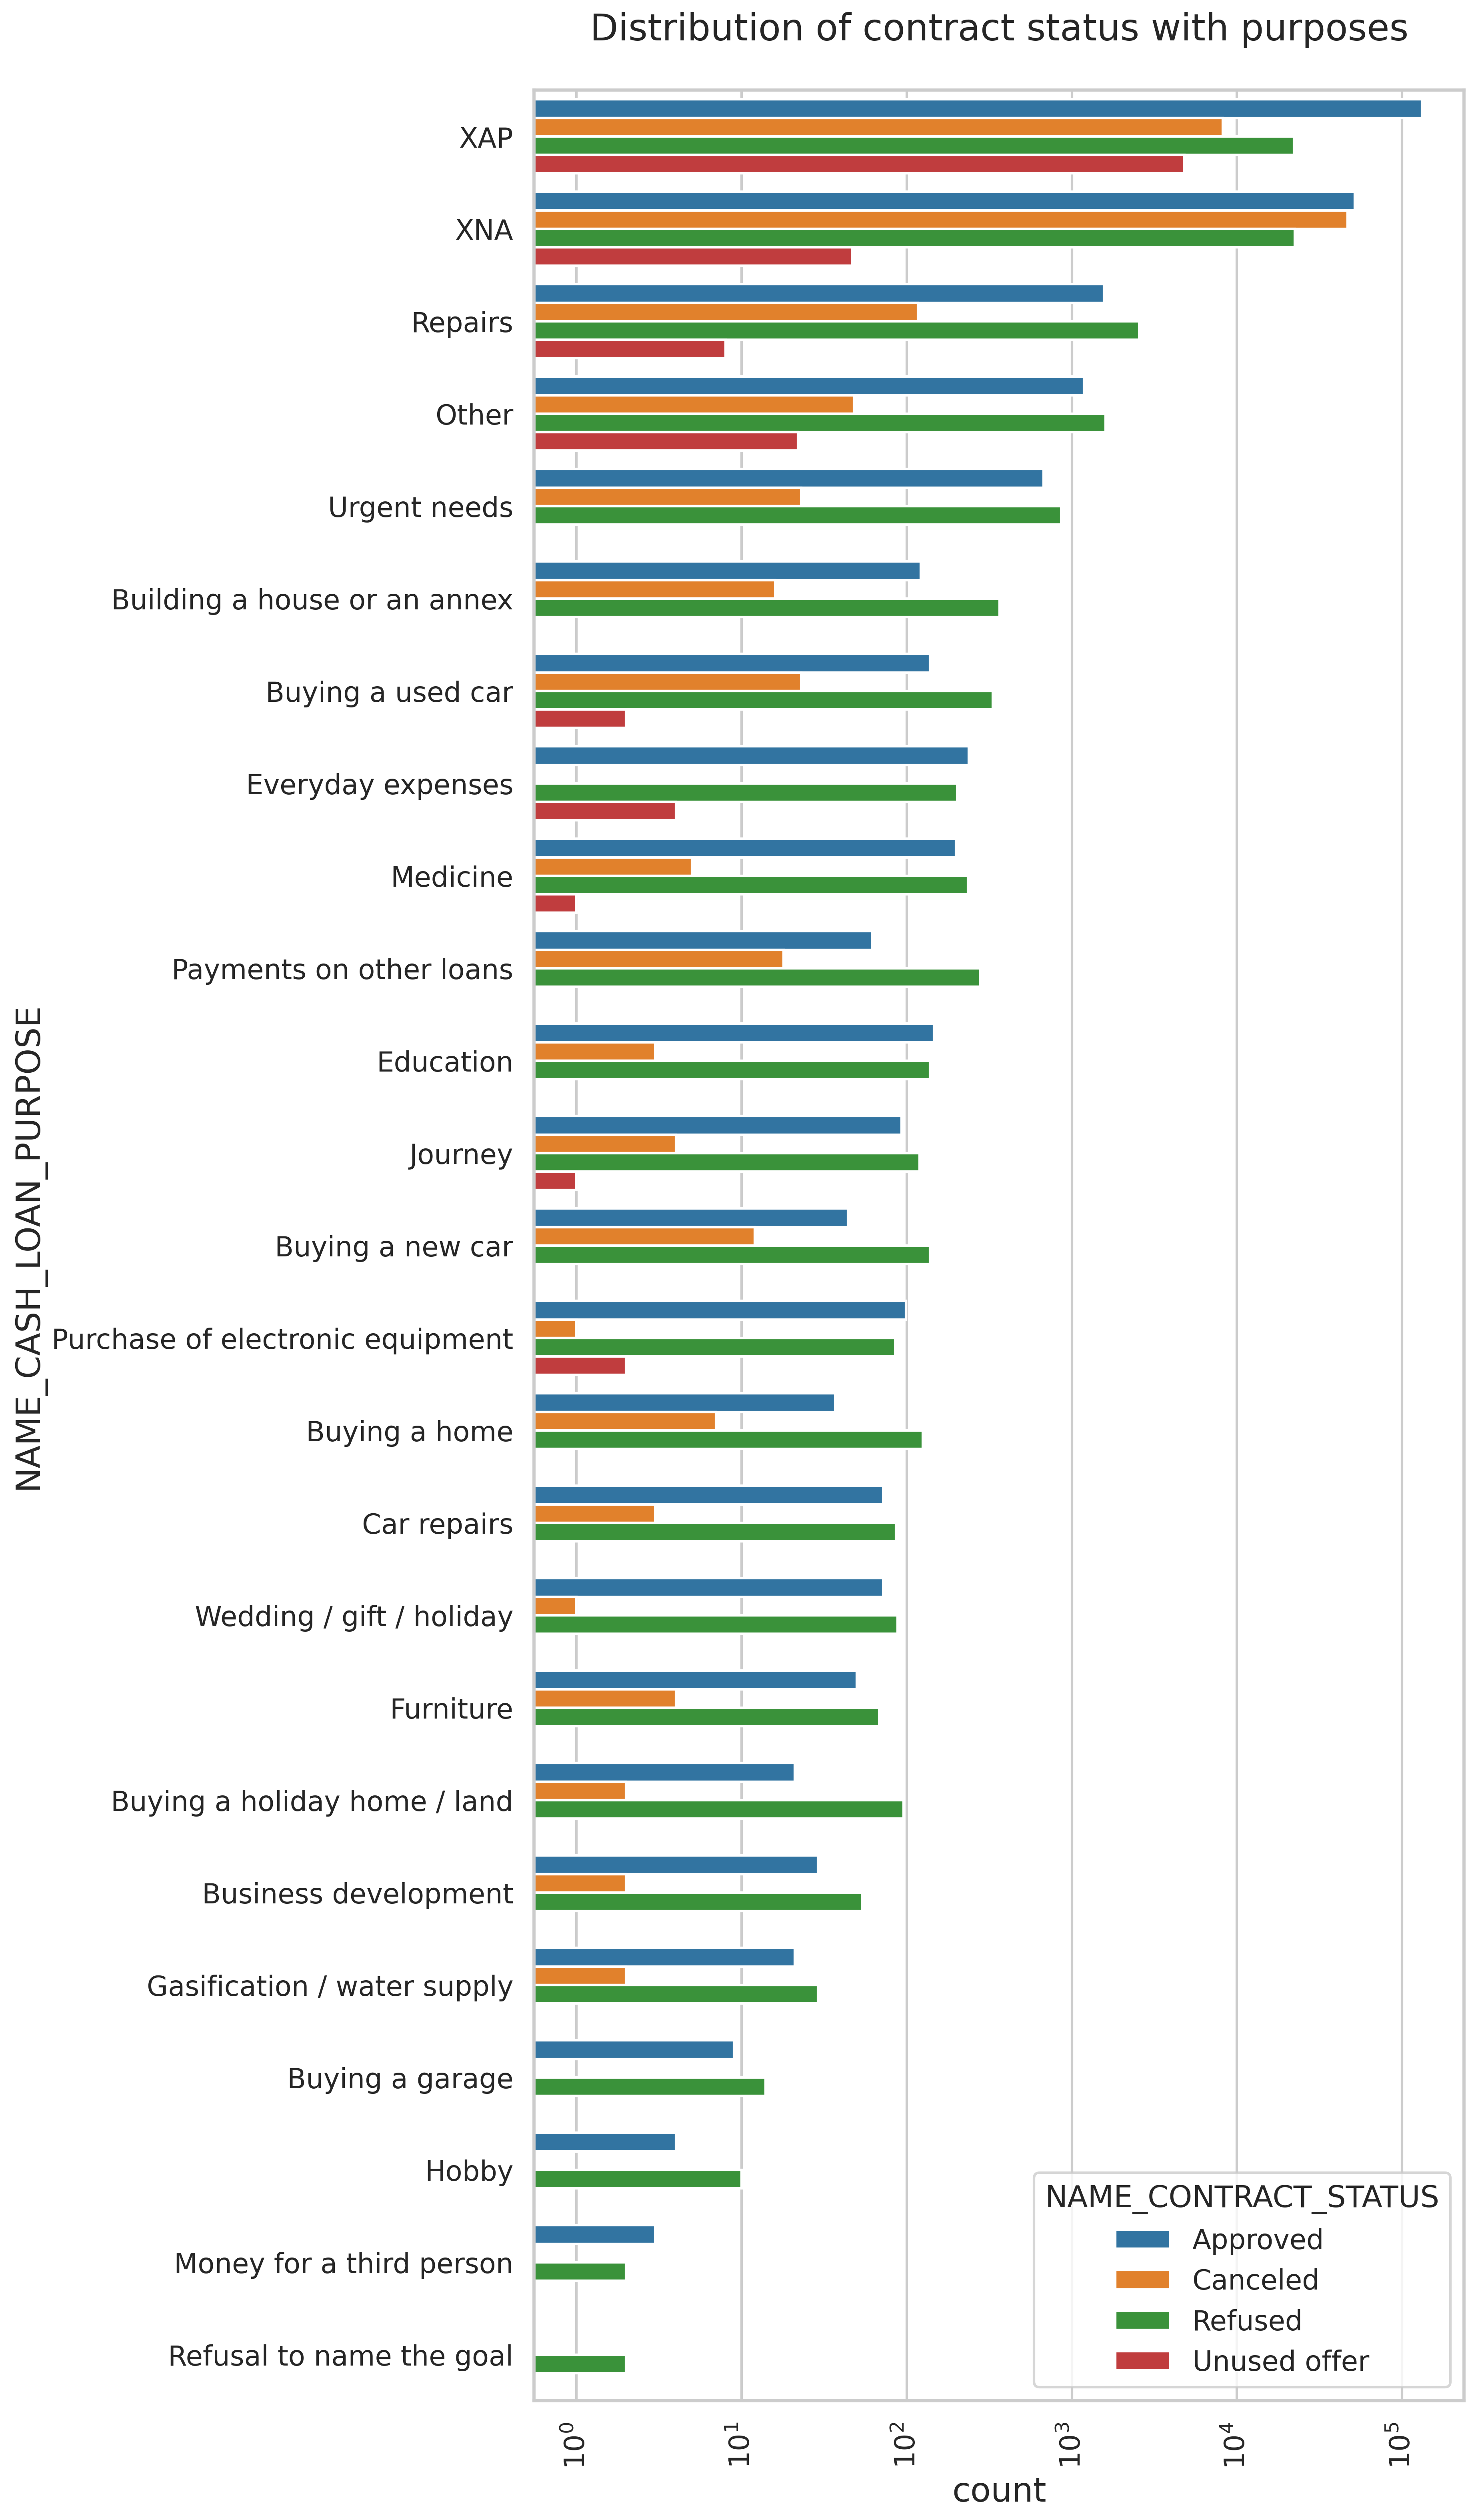

In [83]:
#Performing Univariate Analysis
# Distribution of contract status in logarithmic scale
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,25),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = df_comb, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_comb['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

Points to be concluded from above plot:

Most rejection of loans came from purpose 'repairs'. For education purposes we have equal number of approves and rejection Payign other loans and buying a new car is having significant higher rejection than approves.

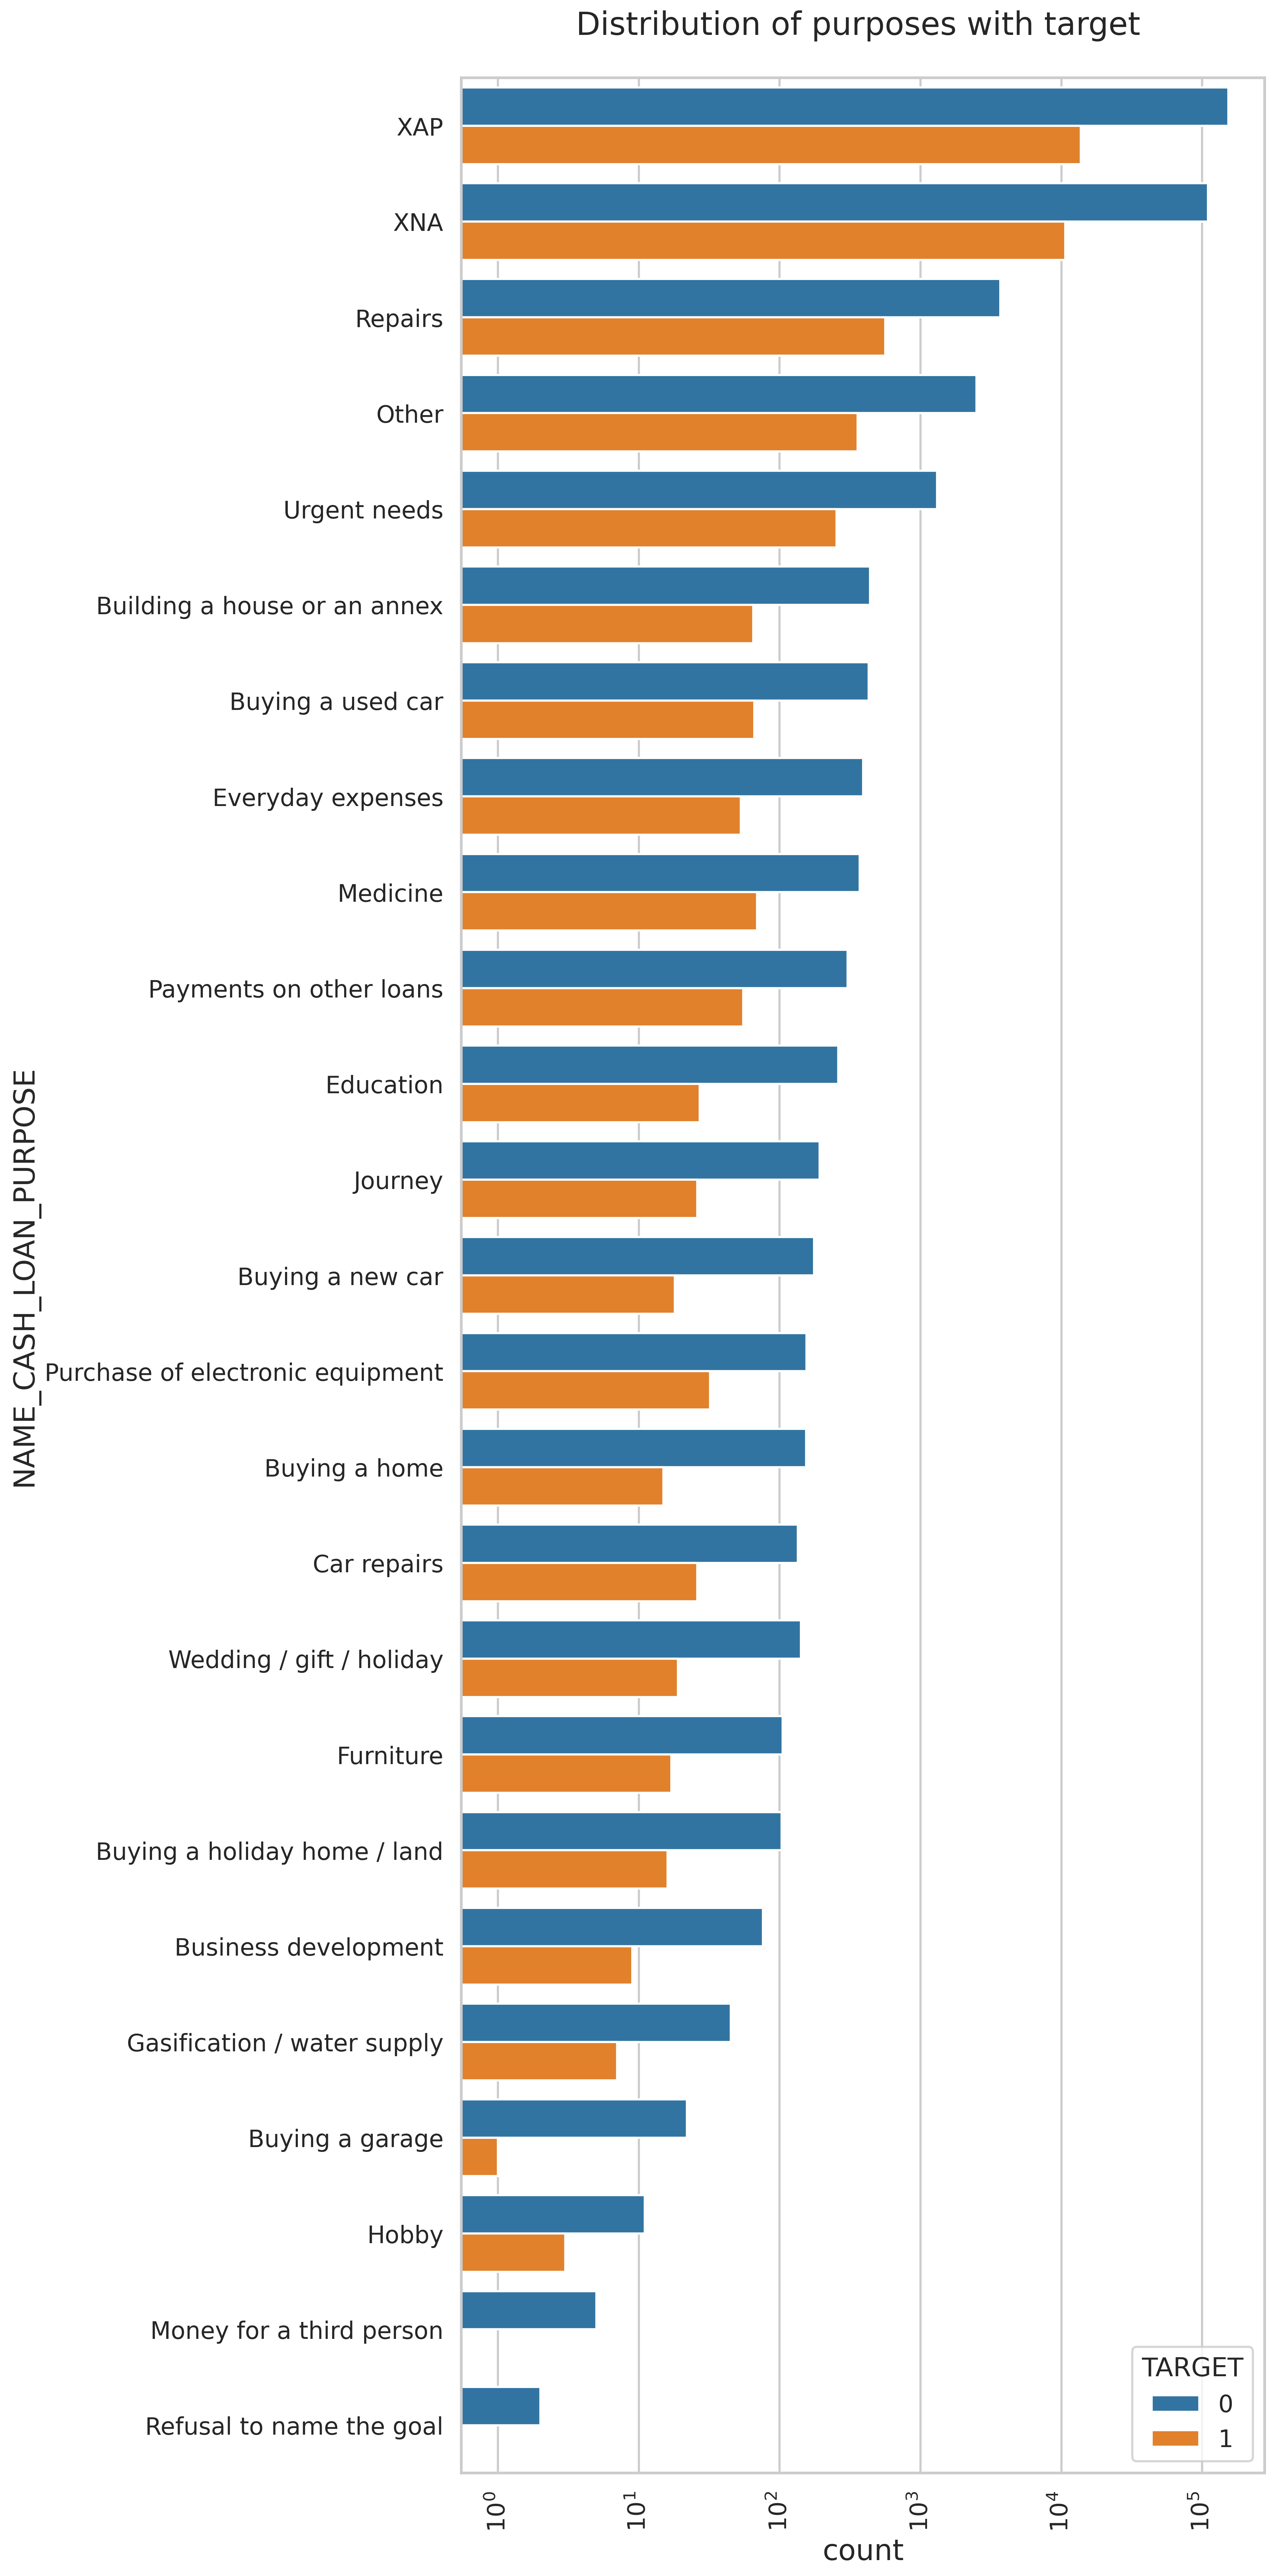

In [84]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,30),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = df_comb, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_comb['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

Few points we can conclude from above plot:

Loan purposes with 'Repairs' are facing more difficulites in payment on time. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.






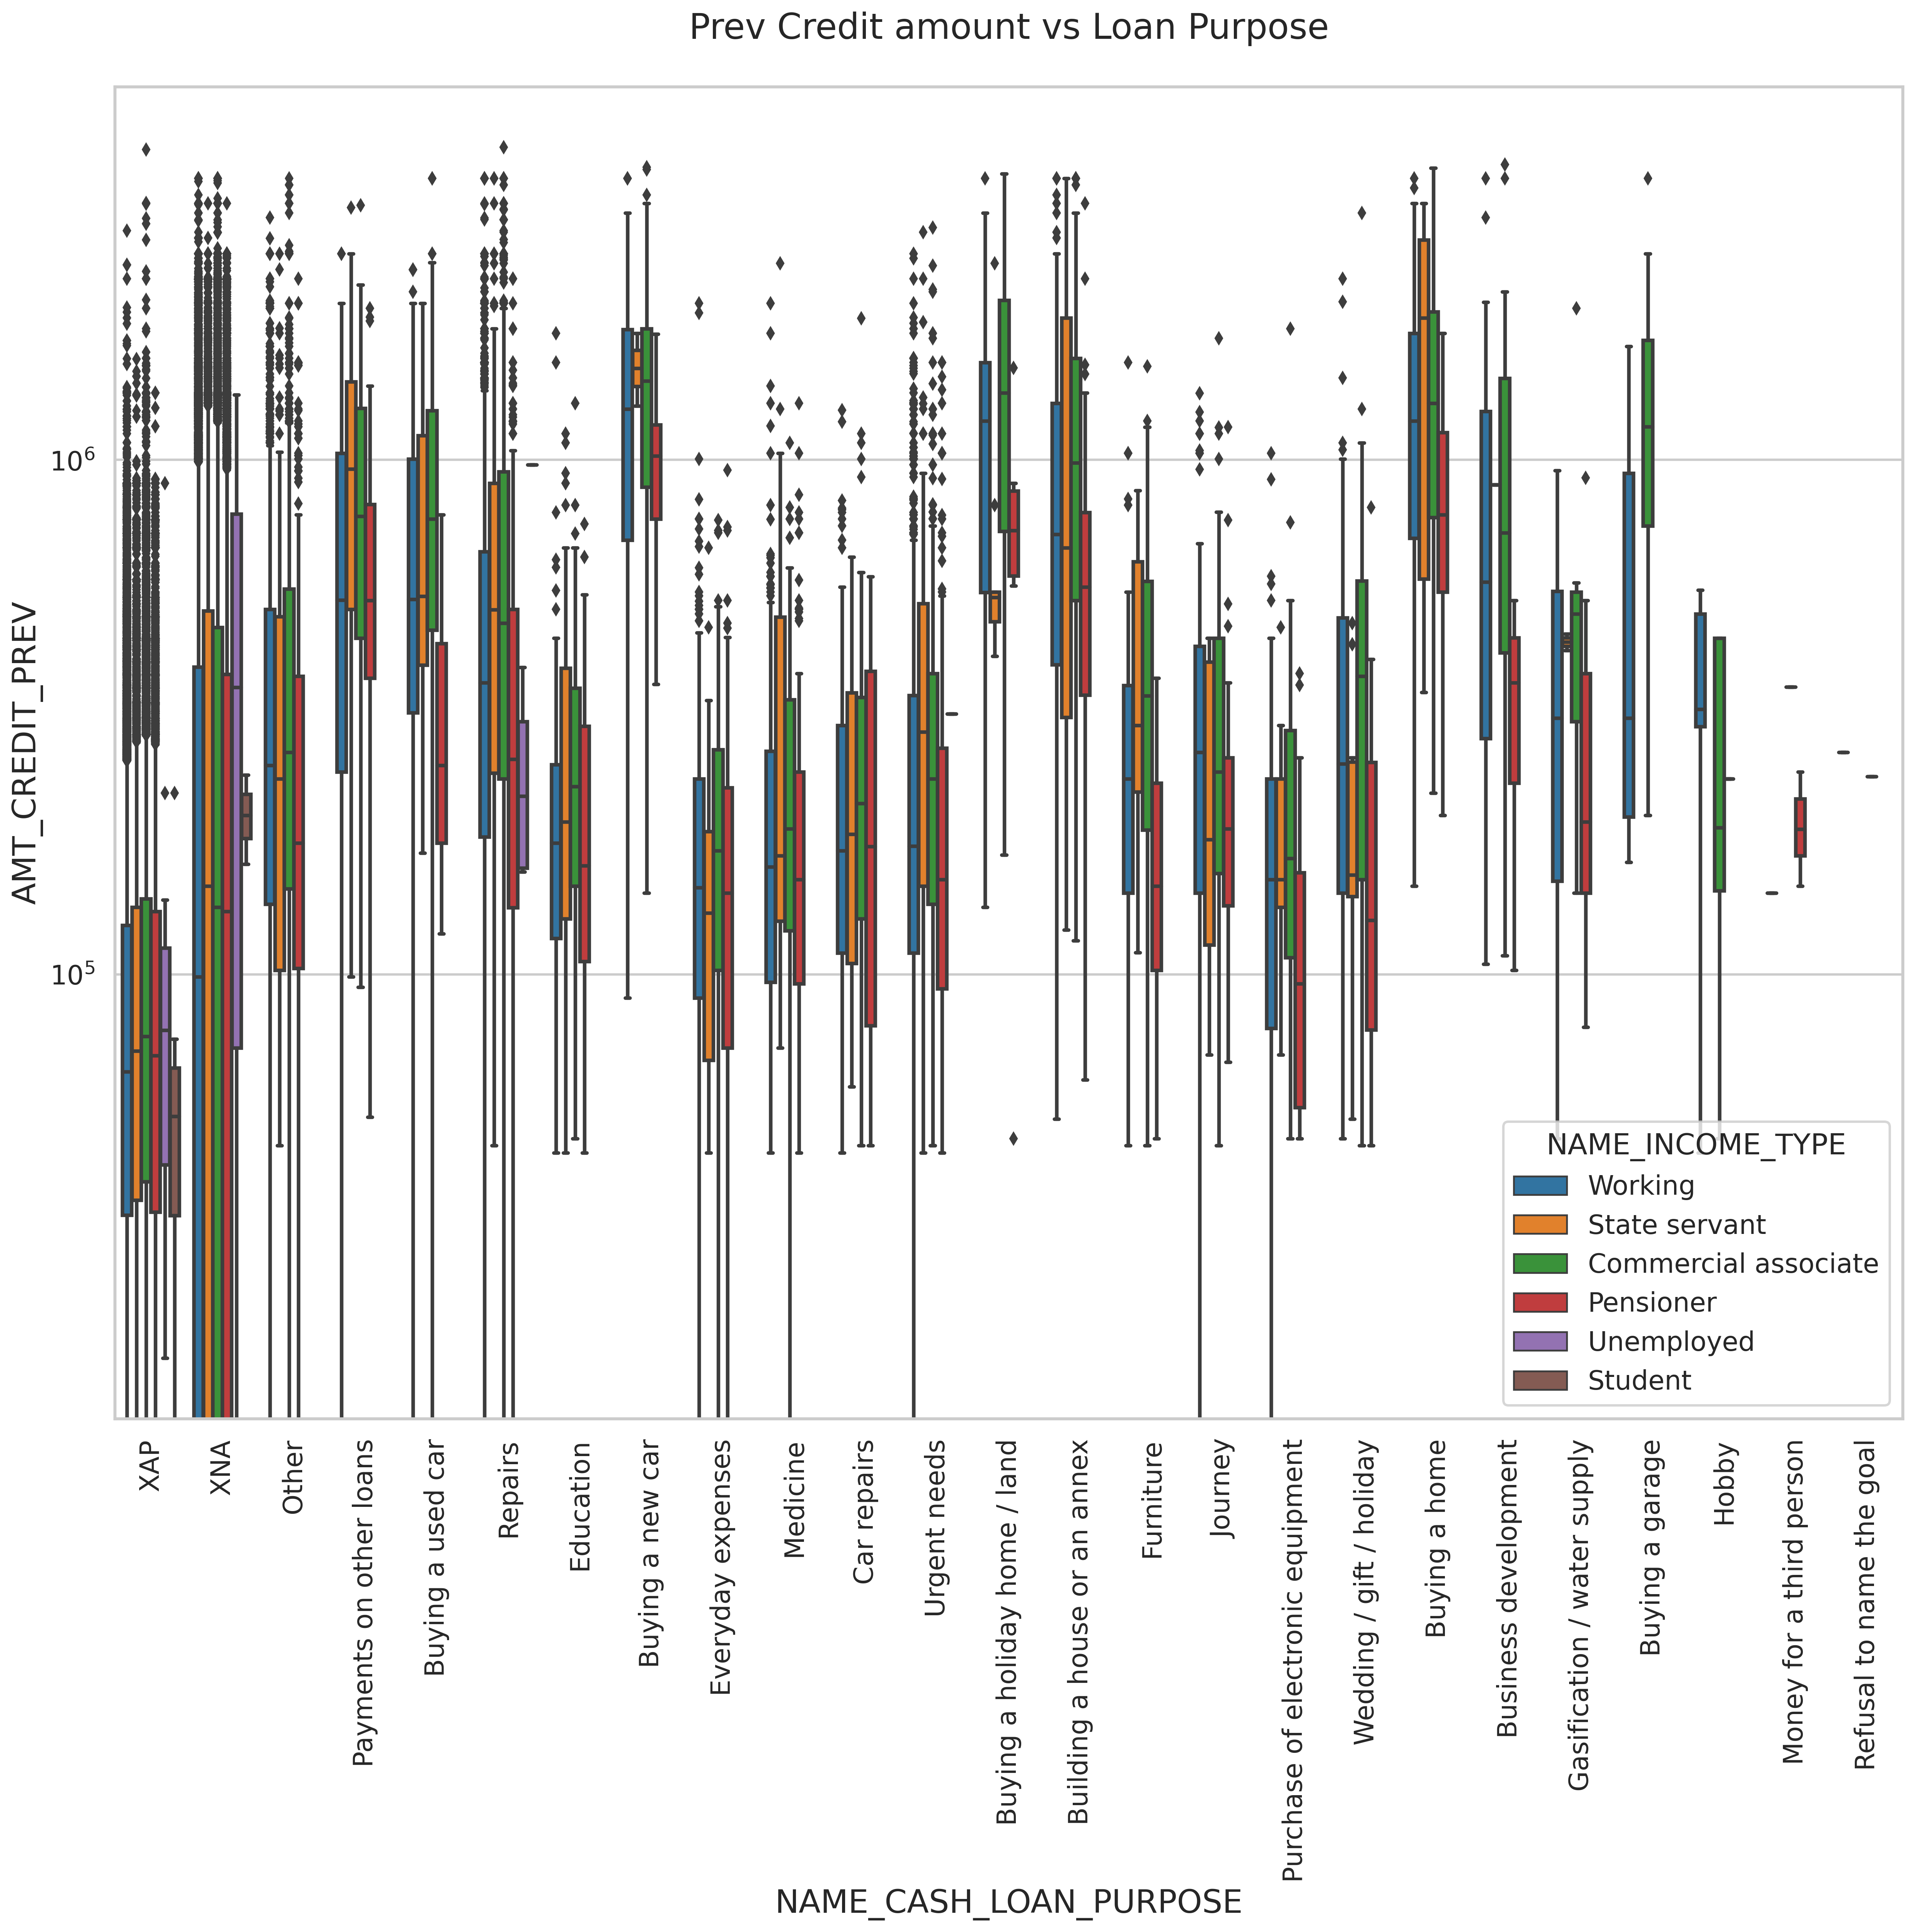

In [85]:
#Bivariate Analysis
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,15),dpi = 300)
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =df_comb, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()


From the above we can conclude some points-

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. Income type of state servants have a significant amount of credit applied Money for third person or a Hobby is having less credits applied for.

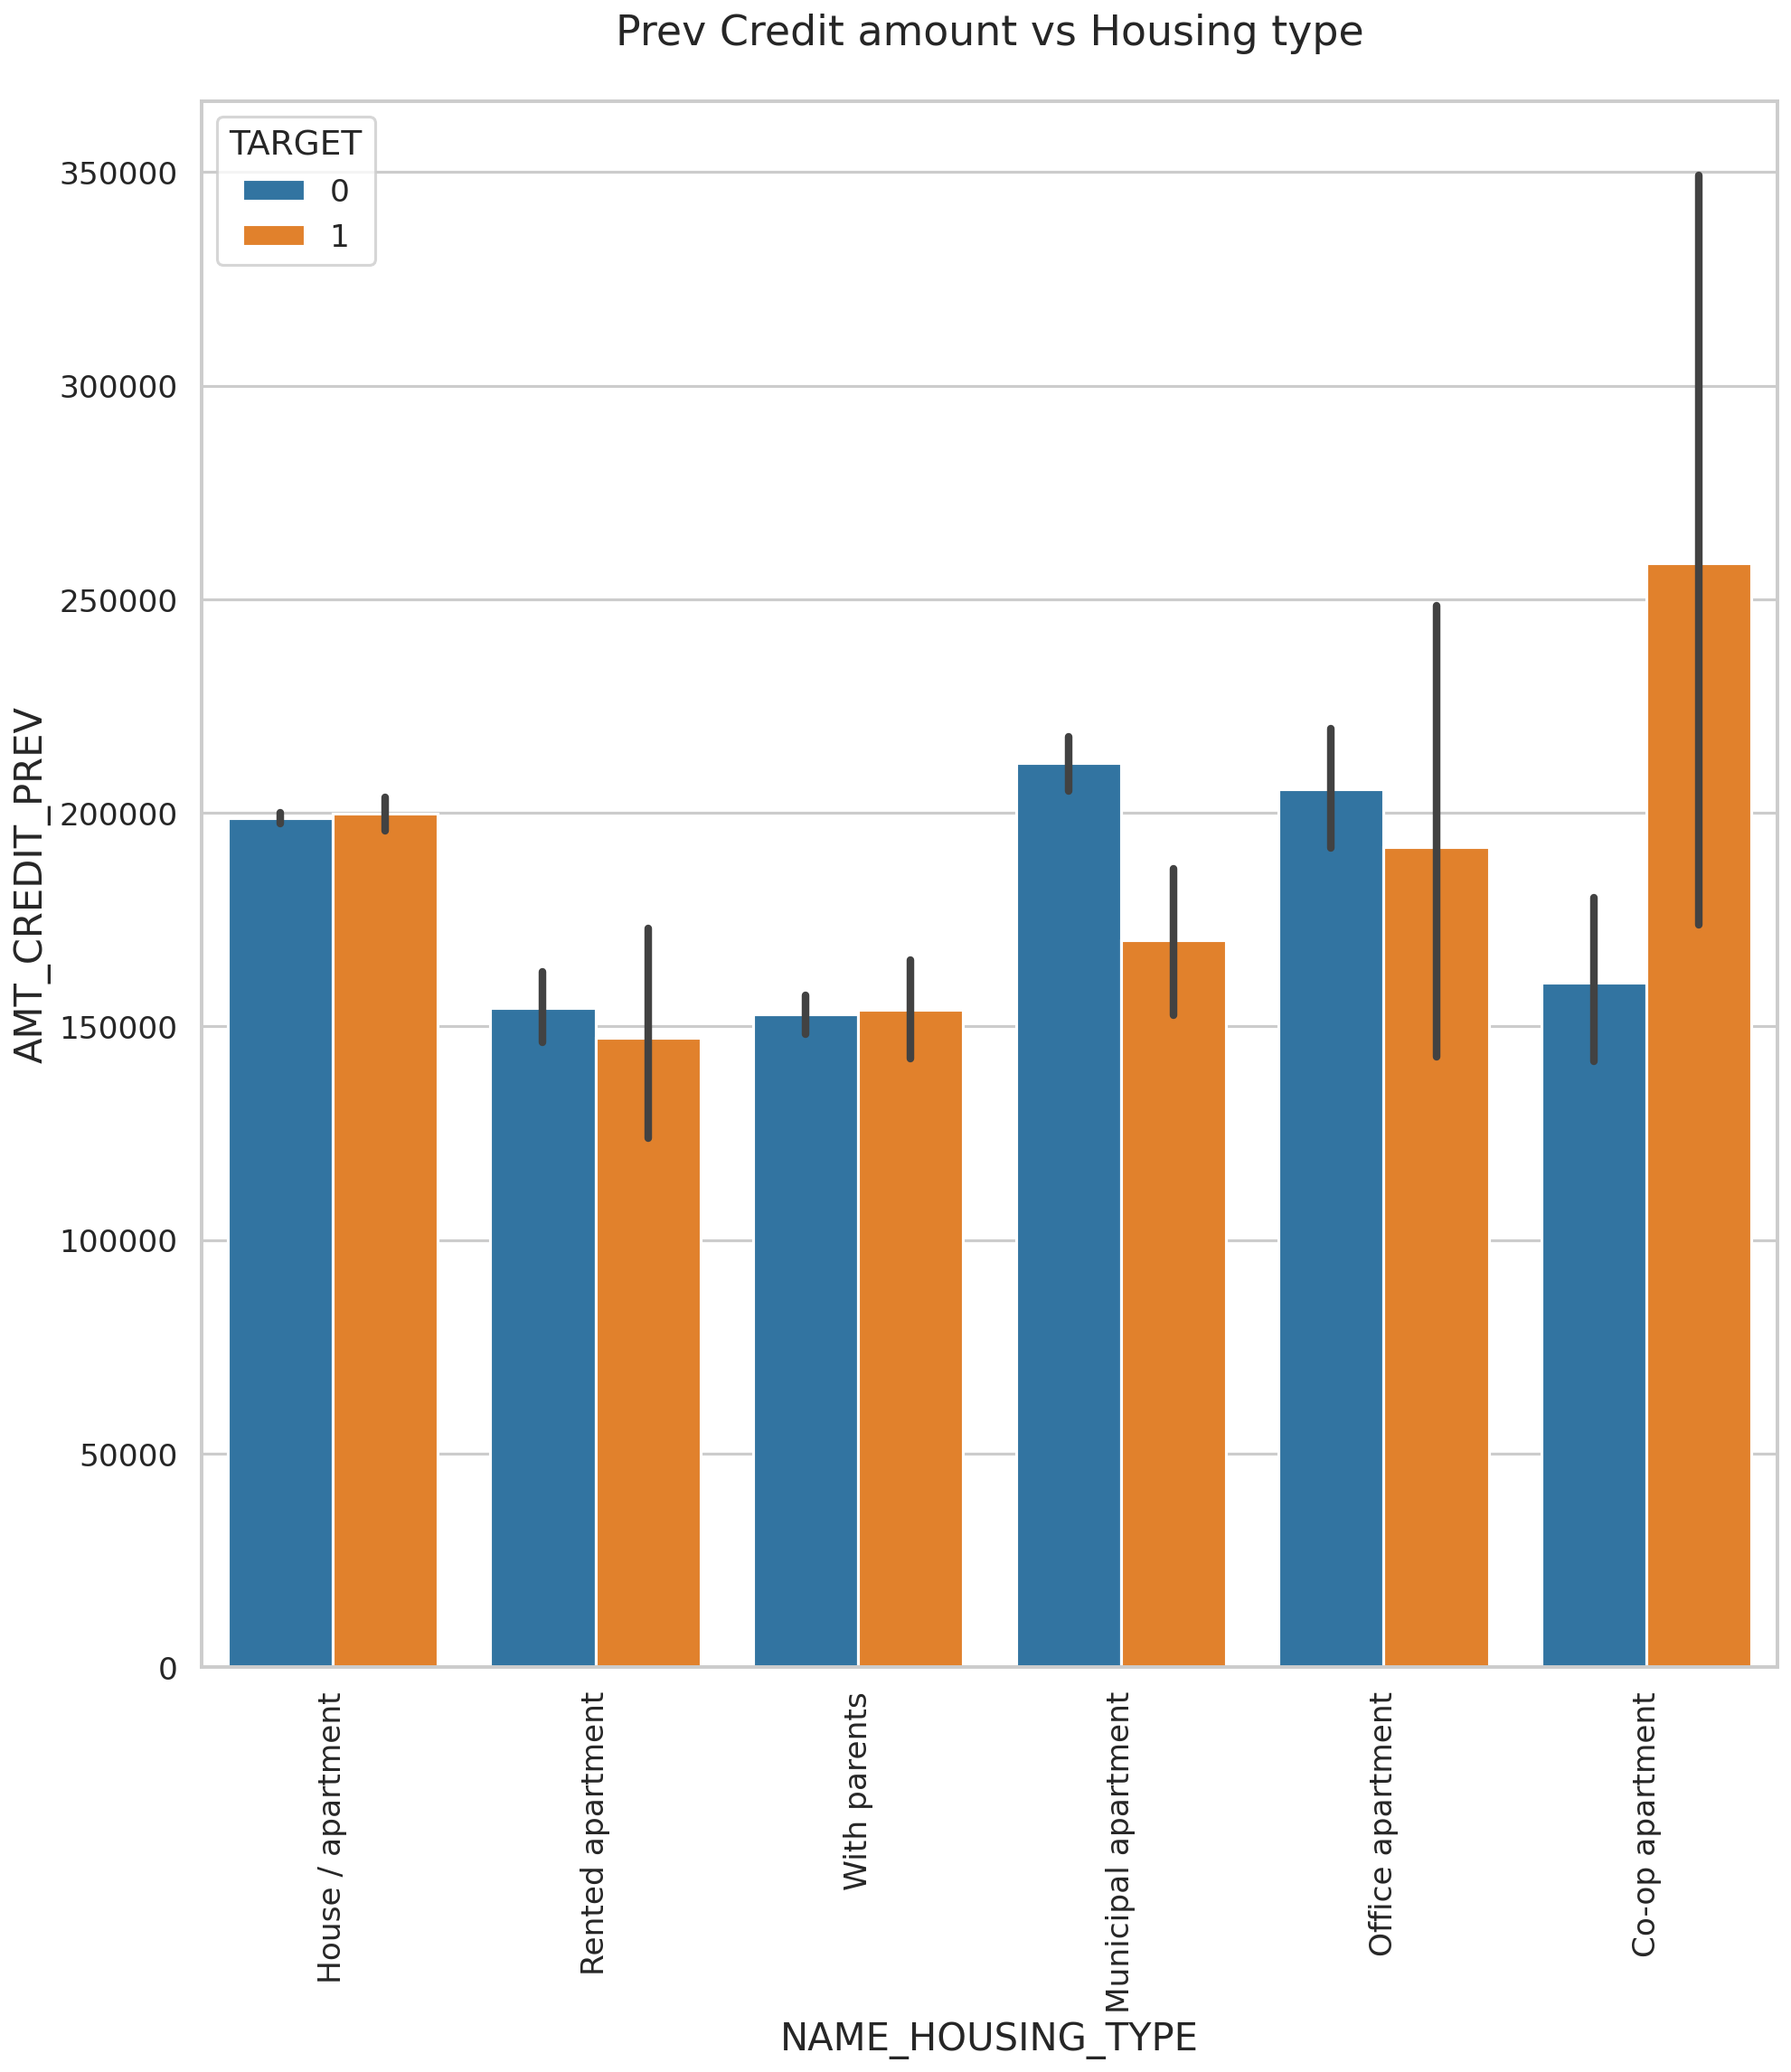

In [86]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(15,15),dpi = 150)
plt.xticks(rotation=90)
sns.barplot(data =df_comb, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

#Conclusion

1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. In loan purpose ‘Repairs’:

a. Although having higher number of rejection in loan purposes with 'Repairs' there are observed difficulties in payment on time.
b. There are few places where loan payment is delay is significantly high.
c. Bank should keep continue to caution while giving loan for this purpose.

4. Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.

5. Bank can focus mostly on housing type ‘with parents’ , ‘House\apartment’ and ‘municipal apartment’ for successful payments.